# **1 - Perkenalan**

---



Bab pengenalan harus diisi dengan identitas, gambaran besar dataset yang digunakan, dan objective yang ingin dicapai.

Nama : Andik Al Fauzi

Objective : Membuat model machine learning untuk membuat prediksi penjualan

#**2 - Background**

Penjualan adalah terjadinya penyaluran suatu barang/jasa dari produsen ke konsumen, baik secara tunai maupun kredit. Dengan adanya penjualan suatu barang/jasa maka diharapkan terjadinya perputaran ekonomi yang baik. Dari sisi produsen mengharapkan terjadinya volume penjualan yang tinggi sehingga akan didapatkan keuntungan yang maksimal. **ParagonCorp** adalah salah satu produsen dari beberapa brand kosmetik di Indonesia. Volume penjualan merupakan ujung tombak dari **ParagonCorp**, hal ini didasari karena salah satu poin penting dalam mencetak laba adalah dengan adanya volume penjualan yang tinggi. Disamping itu, ketersediaan produk juga sangat berpengaruh terhadap performa penjualan. Dengan diawasi dan diatur dengan baik stok suatu produk, maka ParagonCorp dapat dengan maksimal memberikan pelayanan kepada customer. Dengan alasan ini maka saya selaku bagian di Data Analyst akan membuat insight dan membuat model prediksi penjualan dari dataset yang sudah ada.

# **3 - Import Libraries**

---



Cell pertama pada notebook harus berisi dan hanya berisi semua library yang digunakan dalam project.

In [76]:
# Importing libraries
import pandas as pd
import numpy as np
import calendar
import pylab
import tensorflow as tf

# Model Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

# Visualization libraries
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Model Preprocessing libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,  mean_squared_error
from math import sqrt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.svm import SVR
from statsmodels.tsa.arima.model import ARIMA
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

# Importing Libraries
import pickle
import json
import datetime as dt

# Warning Library
import warnings
warnings.filterwarnings('ignore')

In [77]:
# Installing other library
!pip install pyramid

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **4 - Data Loading**

---



Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom, mengecek ukuran dataset, dll.

In [78]:
# Load the data
data = pd.read_csv('https://raw.githubusercontent.com/andik-alfauzi/Final-Project/main/sample_dataset_timeseries_noarea.csv')

# Display
data.head(10)

,week_number,week_start_date,week_end_date,product_item,quantity
0,2021-52,2021-12-27,2022-01-02,0073377087c7ddace313ff829cd7b0b3,41
1,2021-52,2021-12-27,2022-01-02,012d2bb142b2d5e57330acbfd8e9ac52,430
2,2021-52,2021-12-27,2022-01-02,0192926e33d1153b63511a5b83eca843,4
3,2021-52,2021-12-27,2022-01-02,019502f6d13e383caa9b9673bf1302f8,148
4,2021-52,2021-12-27,2022-01-02,01e7ca6d4e21badc1d4225b6b2c7bd9e,119
5,2021-52,2021-12-27,2022-01-02,01fa9977e1c61ce5542c6f0c2a1b2895,2
6,2021-52,2021-12-27,2022-01-02,043e6d02d98b44c40645c8a22812fe88,44
7,2021-52,2021-12-27,2022-01-02,0512efdcc99fa4d57c42cd2cf6c73633,165
8,2021-52,2021-12-27,2022-01-02,05262da388ab82c51c48c9535bc8b121,41
9,2021-52,2021-12-27,2022-01-02,058cc2cecb91d10e901a597e67532619,383


# **5 - Exploratory Data Analysis (EDA)**

---

Bagian ini berisi eksplorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.



In [79]:
# Describing data
data.describe()

,quantity
count,102733.000000
mean,3191.562419
std,12074.631014
min,0.000000
25%,75.000000
50%,414.000000
75%,1890.000000
max,774732.000000


Dari statistik singkat diatas dapat dianalisa bahwa dataset berjumlah 102733 dengan quantity maksimum ada di 774732 dan terendah ada di angka 0. Hal ini mungkin ada beberapa missing value yang akan dihandle kemudian.

In [80]:
# Info dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102733 entries, 0 to 102732
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   week_number      102733 non-null  object
 1   week_start_date  102733 non-null  object
 2   week_end_date    102733 non-null  object
 3   product_item     102731 non-null  object
 4   quantity         102733 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 3.9+ MB


Hampir semua data bertipe object, hanya 1 yang bertipe numerik yaitu quantity

In [81]:
# Convert dataset
data['week_start_date'] = pd.to_datetime(data['week_start_date'], format='%Y-%m-%d')
data['week_end_date'] = pd.to_datetime(data['week_end_date'], format='%Y-%m-%d')

# Check after converting
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102733 entries, 0 to 102732
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   week_number      102733 non-null  object        
 1   week_start_date  102733 non-null  datetime64[ns]
 2   week_end_date    102733 non-null  datetime64[ns]
 3   product_item     102731 non-null  object        
 4   quantity         102733 non-null  int64         
dtypes: datetime64[ns](2), int64(1), object(2)
memory usage: 3.9+ MB


Data dikolom `week_start_date` dan `week_end_date` sudah diganti menjadi data time-series.

In [82]:
# Check invertal of data
data['freq'] = ((data['week_end_date'] - data['week_start_date']).dt.days)+1

# Display
print('Interval date range : ', data.freq.unique())

Interval date range :  [7]


Semua data memiliki range yang sama yaitu penjualan mingguan

In [83]:
# Check missing value
data.loc[(data['quantity'] == 0)]

,week_number,week_start_date,week_end_date,product_item,quantity,freq
72589,2022-47,2022-11-21,2022-11-27,6adc4ddabd44c5aa2f4c6105ceda926a,0,7
74199,2022-48,2022-11-28,2022-12-04,6adc4ddabd44c5aa2f4c6105ceda926a,0,7
75806,2022-49,2022-12-05,2022-12-11,6adc4ddabd44c5aa2f4c6105ceda926a,0,7


Produk item dengan kode **6adc4ddabd44c5aa2f4c6105ceda926a** yang tidak memiliki performa penjualan

In [84]:
# Check duplicated
data.duplicated().sum()

0

No data duplicated

In [85]:
# Check missing value
print('Data missing in dataset : ')
print('')
print(data.isnull().sum())

Data missing in dataset : 

week_number        0
week_start_date    0
week_end_date      0
product_item       2
quantity           0
freq               0
dtype: int64


Terdapat data missing sebanyak 2 dikolom `product_item`, karena data yang missing hanya 2 dari 102.733 maka data missing tersebut akan didrop.

In [86]:
# Drop missing data
data = data.dropna()

In [87]:
# Check after drop
print('Data missing in dataset : ')
print('')
print(data.isnull().sum())

Data missing in dataset : 

week_number        0
week_start_date    0
week_end_date      0
product_item       0
quantity           0
freq               0
dtype: int64


Missing value berhasil didrop

In [88]:
# Check sales per item
salesPerItem = data.groupby('product_item', as_index=False)['quantity'].sum()

# Creating dataframe
salesPerItem = pd.DataFrame(salesPerItem)

# Display
salesPerItem

,product_item,quantity
0,00450b4fde94b528b4255b4f6f51599d,15691
1,0065e8b533cd2c8273529312a6e8f219,29334
2,0073377087c7ddace313ff829cd7b0b3,9645
3,0098d23d332c193a07eabaf0f703d4e5,214632
4,009e12e8fd2ef0b77047206e939fc6b9,39402
...,...,...
2304,ff92741956851dca5a1daafeef1d9dd7,16
2305,ff9d05a4d6f922b3ab1653f58165b8ce,16
2306,ffbd6f1d884056a4f622d54ae79e5a14,3532900
2307,ffdf02b13a7c56d736d6a5ca701d936b,218


In [89]:
# Describing sales per item
salesPerItem.describe()

,quantity
count,2.309000e+03
mean,1.420002e+05
std,5.951554e+05
min,2.000000e+00
25%,8.960000e+02
50%,1.040600e+04
75%,7.377700e+04
max,1.820638e+07


Penjualan maksimal per item ada di angka 18 jutaan product yang terjual dan terendah ada di angka 2 product

In [90]:
# Check the product_item sales frequency
data.product_item.value_counts()

0073377087c7ddace313ff829cd7b0b3    67
870b3ad8c41b746b29ba31f6e4040950    67
9264576b8833b892b34a39525bcdd271    67
921cfbd1930eeee6b82a7b053c4ed8dc    67
91f65f29b32c39788b4294cbe2be7024    67
                                    ..
d97d3a3e53124b6b1a8313403f54f6b8     1
d963020bd8d76659c6768ad252be9629     1
d4e90f2dcbcf53757d6bd1f3b6f368cb     1
170ad92bf82a3509886ceb841cd6e3c3     1
ff9d05a4d6f922b3ab1653f58165b8ce     1
Name: product_item, Length: 2309, dtype: int64

Dapat dilihat pada data tersebut, dimana `product_item` terbanyak ada di angka 67 dan terendah ada di angka 1.

Berdasarkan data diatas, SKU (Stok Keeping Unit) adalah suatu kode yang diidentifikasikan terhadap suatu barang untuk menandai suatu barang yang dijual ataupun dibeli. Atau dapat dikatakan SKU adalah suatu kode unik dari seorang wirausahawan untuk menandai suatu barang yang akan dijual.

Manfaat dari pemberian SKU ini adalah :
1. Mempermudah control stok barang
2. Mempercepat proses transaksi
3. Mempermudah pencarian terhadap suatu barang
4. Analisis bisnis terkait suatu produk
5. Perencanaan suplai terhadap suatu produk

In [91]:
# Check low sales of product_item
under5Sales = salesPerItem.loc[(salesPerItem.quantity) <= 5]
under5Sales

,product_item,quantity
31,032115532ec9ddd8db33270b89c2b3b4,3
53,04f23ce3472359127503baafdcd26566,4
65,05c5f7ef2c62812ad43171bd0c68e5a8,4
81,06fd73444a38e1d15daf3f6e6daf518c,2
109,0a34b8158913801066a50897e0aeeede,3
...,...,...
2219,f702a4c4a8e81c980e2b6af3768cef6f,4
2223,f73327a6adb4669763189b8761d13a4e,4
2225,f782021abbbc96df1994396320f1d7fd,4
2270,fc44bfd0a54abcf7bd6442fd6706aaab,4


Dari data diatas, dapat dilihat ada 98 `product_item` yang memiliki volume penjualan sampai dengan 5 barang. Hal ini perlu diperhatikan dan ditingkatkan lagi promosi terhadap barang tersebut agar penjualannya bisa semakin meningkat. Atau jika memang respon pasar tidak terlalu baik terhadap barang diatas, maka mungkin dari pihak management bisa memutuskan untuk discontinue terhadap barang tersebut.

In [92]:
# Check the lowest sales
lowSales = data.loc[(data['quantity'] <= 5)]
lowSales

,week_number,week_start_date,week_end_date,product_item,quantity,freq
2,2021-52,2021-12-27,2022-01-02,0192926e33d1153b63511a5b83eca843,4,7
5,2021-52,2021-12-27,2022-01-02,01fa9977e1c61ce5542c6f0c2a1b2895,2,7
18,2021-52,2021-12-27,2022-01-02,09526918c3845ef9d13fbde9f90f608a,3,7
19,2021-52,2021-12-27,2022-01-02,09ba614cfa8b54cecbfb8cae73e5ce61,2,7
22,2021-52,2021-12-27,2022-01-02,0e1e5658dae97cd8dedf084b1c0753a1,3,7
...,...,...,...,...,...,...
102601,2023-14,2023-04-03,2023-04-09,ea19d8d861f541d67b7f5cabf230c92a,4,7
102637,2023-14,2023-04-03,2023-04-09,ef3b8ecd6b7ad7f30508da89a07db067,2,7
102676,2023-14,2023-04-03,2023-04-09,f68d9bdc3915db2e900a78f6d4be6285,2,7
102683,2023-14,2023-04-03,2023-04-09,f7c2b5ff6ba252b780780252ae357cfe,4,7


In [93]:
# Grouping lowest sales
lowSales = lowSales.groupby('week_start_date')['quantity'].sum()
lowSales = pd.DataFrame(lowSales)
lowSales

,quantity
week_start_date,
2021-12-27,178
2022-01-03,271
2022-01-10,152
2022-01-17,280
2022-01-24,143
...,...
2023-03-06,235
2023-03-13,237
2023-03-20,260


<Figure size 1600x800 with 0 Axes>

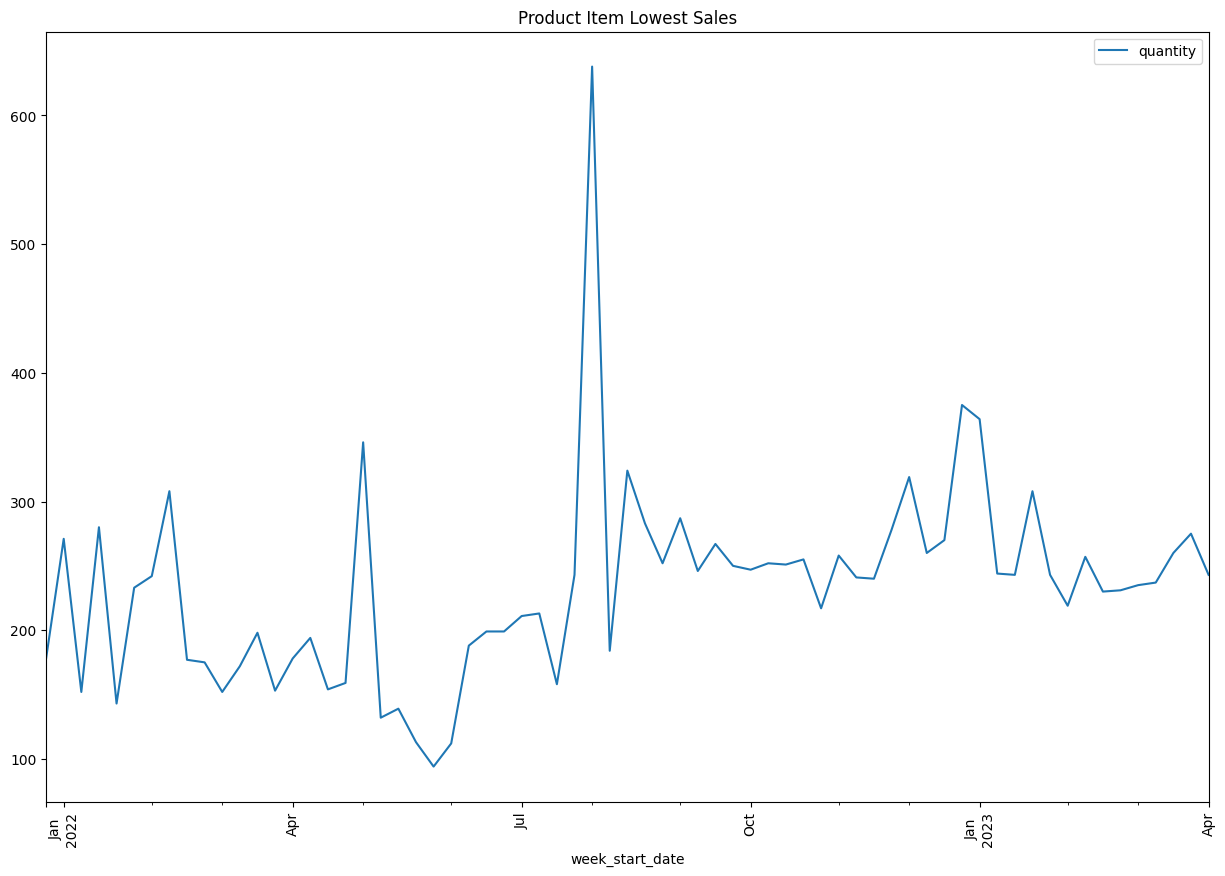

In [94]:
# Visualize low sales
plt.figure(figsize=(16, 8))
lowSales.plot()
plt.xticks(rotation=90)
plt.title('Product Item Lowest Sales')
plt.show()

Dapat dilihat pada grafik untuk penjualan pada May - June 2022 mengalami penjualan yang sangat rendah, dimana total penjualan product_item dibawah 5 barang hanya dibawah 100. Hal ini mungkin diakibatkan karena adanya Libur Idul Fitri 1443 Hijriah dan adanya proses Pendaftaran siswa baru/Kenaikan kelas, sehingga para pelanggan tidak memiliki budget untuk membeli product-product dari **ParagonCorp**. Sedangkan dari total penjualan pada bulan September 2022 memiliki performa yang cukup baik dimana total penjualan dapat mencapai 610 barang. Hal ini mungkin adanya promosi yang gencar terhadap product yang memiliki performa penjualan dibawah 5 barang tersebut.

In [95]:
# Prepare Data
sales = data.groupby('week_start_date')['quantity'].sum().reset_index()

# Display
sales.head(10)

,week_start_date,quantity
0,2021-12-27,128808
1,2022-01-03,3839557
2,2022-01-10,4138934
3,2022-01-17,4149077
4,2022-01-24,4824273
5,2022-01-31,4008027
6,2022-02-07,4311010
7,2022-02-14,3882636
8,2022-02-21,4256541
9,2022-02-28,3883810


Ini merupakan dataset yang akan  digunakan untuk membuat model prediksi. Data di kolom `week_start_date` dan `quantity` adalah data yang akan digunakan nantinya.

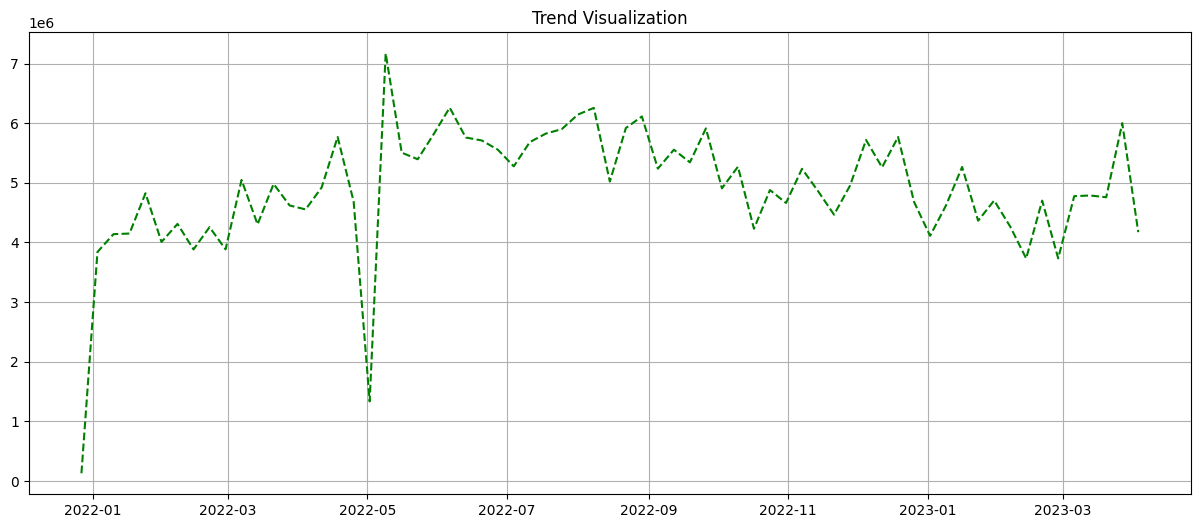

In [96]:
# Visualize the sales data
plt.figure(figsize=(15,6))
plt.plot(sales['week_start_date'], sales['quantity'], linestyle='dashed', color='Green')
plt.title('Trend Visualization')
plt.grid(True)
plt.show()

Dari trend visualisasi diatas menunjukan performa penjualan mengalami fluktuatif. Khususnya pada bulan May 2022 yang merupakan total penjualan terendah dengan total penjualan hanya berkisar 1,5 juta product. Dapat dilihat pada bulan tersebut memang bertepatan dengan adanya cuti bersama dan libur Idul Fitri 1443 Hijriah dan juga persiapan penerimaan siswa baru dan kenaikan kelas sehingga daya beli konsumen terhadap produk kosmetik sedikit mengalami penurunan. 

In [97]:
# Change index to time series
timeFlowSales = sales.set_index('week_start_date')
timeFlowSales.index

DatetimeIndex(['2021-12-27', '2022-01-03', '2022-01-10', '2022-01-17',
               '2022-01-24', '2022-01-31', '2022-02-07', '2022-02-14',
               '2022-02-21', '2022-02-28', '2022-03-07', '2022-03-14',
               '2022-03-21', '2022-03-28', '2022-04-04', '2022-04-11',
               '2022-04-18', '2022-04-25', '2022-05-02', '2022-05-09',
               '2022-05-16', '2022-05-23', '2022-05-30', '2022-06-06',
               '2022-06-13', '2022-06-20', '2022-06-27', '2022-07-04',
               '2022-07-11', '2022-07-18', '2022-07-25', '2022-08-01',
               '2022-08-08', '2022-08-15', '2022-08-22', '2022-08-29',
               '2022-09-05', '2022-09-12', '2022-09-19', '2022-09-26',
               '2022-10-03', '2022-10-10', '2022-10-17', '2022-10-24',
               '2022-10-31', '2022-11-07', '2022-11-14', '2022-11-21',
               '2022-11-28', '2022-12-05', '2022-12-12', '2022-12-19',
               '2022-12-26', '2023-01-02', '2023-01-09', '2023-01-16',
      

Reset index menjadi time-series ini digunakan untuk mempermudah tracking dan analysis data.

In [98]:
# Add column year, month and day
timeFlowSales['year'] = pd.DatetimeIndex(timeFlowSales.index).year
timeFlowSales['month'] = pd.DatetimeIndex(timeFlowSales.index).month
timeFlowSales['day'] = pd.DatetimeIndex(timeFlowSales.index).day_name()

# Display
timeFlowSales

,quantity,year,month,day
week_start_date,,,,
2021-12-27,128808,2021,12,Monday
2022-01-03,3839557,2022,1,Monday
2022-01-10,4138934,2022,1,Monday
2022-01-17,4149077,2022,1,Monday
2022-01-24,4824273,2022,1,Monday
...,...,...,...,...
2023-03-06,4775638,2023,3,Monday
2023-03-13,4787111,2023,3,Monday
2023-03-20,4757590,2023,3,Monday


Dapat dilihat pada data diatas, data `week_start_date` selalu diambil pada hari Senin dan setiap bulan ada 4-5 kali tergantung dari bulannya.

## 5.1 Statistika Deskriptif

In [99]:
# Describe data
timeFlowSales.describe()

,quantity,year,month
count,6.700000e+01,67.000000,67.000000
mean,4.893709e+06,2022.194030,5.626866
std,1.044440e+06,0.434804,3.663232
min,1.288080e+05,2021.000000,1.000000
25%,4.337716e+06,2022.000000,2.000000
50%,4.907074e+06,2022.000000,5.000000
75%,5.619344e+06,2022.000000,9.000000
max,7.172144e+06,2023.000000,12.000000


Dari deskripsi diatas, penjualan terendah ada diangka 128808 produk sedangkan tertinggi ada diangka 7172144 produk yaitu pada bulan May-2022 pada pekan awal. Sedangkan rata-rata penjualan per-pekan berada di angka 4893709 produk dengan penjualan ditahun 2021-2023

In [100]:
# Check max sales
maxSales = timeFlowSales.loc[timeFlowSales['quantity'].idxmax()]
maxSales

quantity    7172144
year           2022
month             5
day          Monday
Name: 2022-05-09 00:00:00, dtype: object

Penjualan tertinggi terjadi pada tanggal 09 May 2022 sebanyak 7172144 barang. Hal ini terjadi mengingat telah selesainya cuti bersama Idul Fitri 1443 Hijriah yang jatuh pada tanggal 02 - 06 May 2022 sehingga performa penjualan kembali meningkat.

## 5.2 Check Seasonality

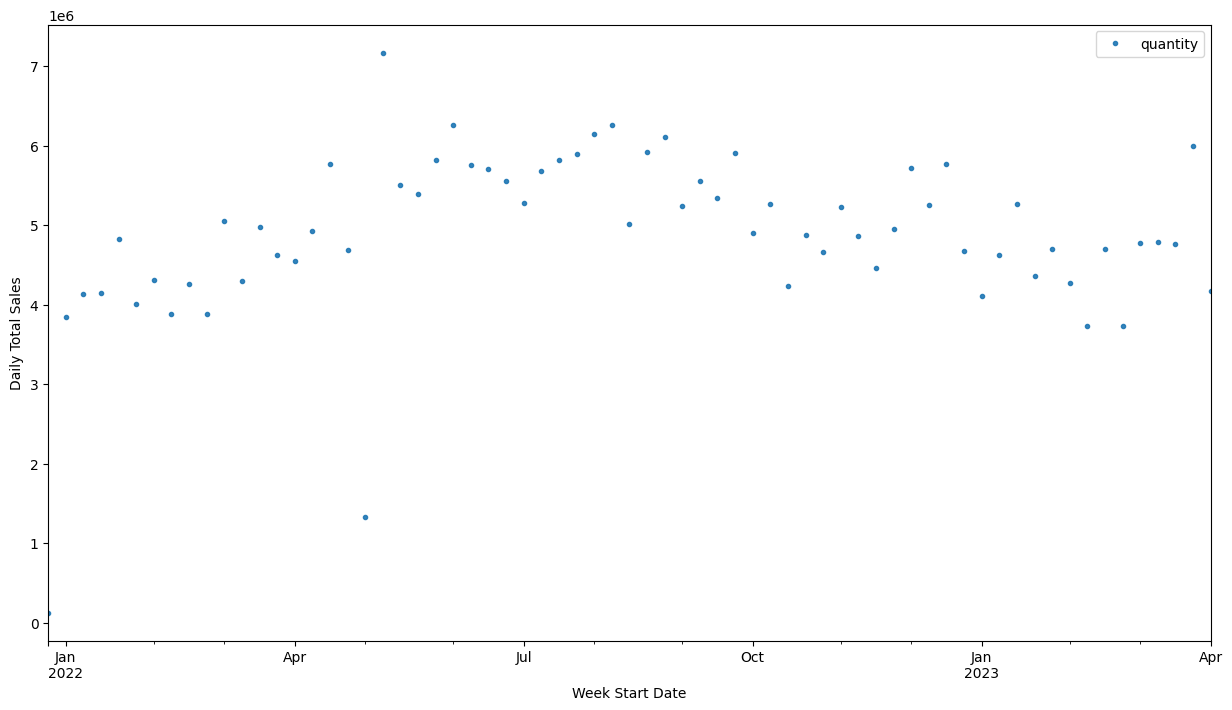

In [101]:
# Check seasonality
colsPlot = ['quantity']
axes = timeFlowSales[colsPlot].plot(marker = '.', alpha=0.9, 
                                    linestyle='None', figsize=(15, 8), subplots=True)
for ax in axes:
  ax.set_ylabel('Daily Total Sales')
  ax.set_xlabel('Week Start Date')

Tujuan dari mengecek seasonality pada data penjualan produk adalah untuk memahami pola-pola tertentu yang terjadi selama periode penjualan dalam satu tahun atau lebih

Dengan mengecek seasonality akan bisa mendapatkan insight apakah suatu produk memiliki pola penjualan tertentu serta mengidentifikasikan faktor-faktor apa saja yang dapat mempengaruhinya, seperti musim liburan, kenaikan kelas, perubahan musim atau acara khusus lainnya. Sehingga dapat membantu Direksi untuk dapat mengambil keputusan mengenai strategi bisnis dan pemasaran yang efektif yang nantinya akan memberikan dampak positif terhadap performa volume penjualan.

Dengan memahami pola-pola penjualan yang sudah terjadi sebelumnya, maka akan bisa membantu dalam membuat model prediksi yang efisien dan lebih akurat.

Untuk mempermudah analisa maka akan dilakukan analisa lanjutan terhadap trend penjualan baik per-pekan, per-bulan dan per-tahun dengan memvisualisasikannya.

### 5.3.1 Yearly - Resampling

In [102]:
# Showing all data
timeFlowSales.loc['2021' :]

,quantity,year,month,day
week_start_date,,,,
2021-12-27,128808,2021,12,Monday
2022-01-03,3839557,2022,1,Monday
2022-01-10,4138934,2022,1,Monday
2022-01-17,4149077,2022,1,Monday
2022-01-24,4824273,2022,1,Monday
...,...,...,...,...
2023-03-06,4775638,2023,3,Monday
2023-03-13,4787111,2023,3,Monday
2023-03-20,4757590,2023,3,Monday


<Axes: xlabel='week_start_date'>

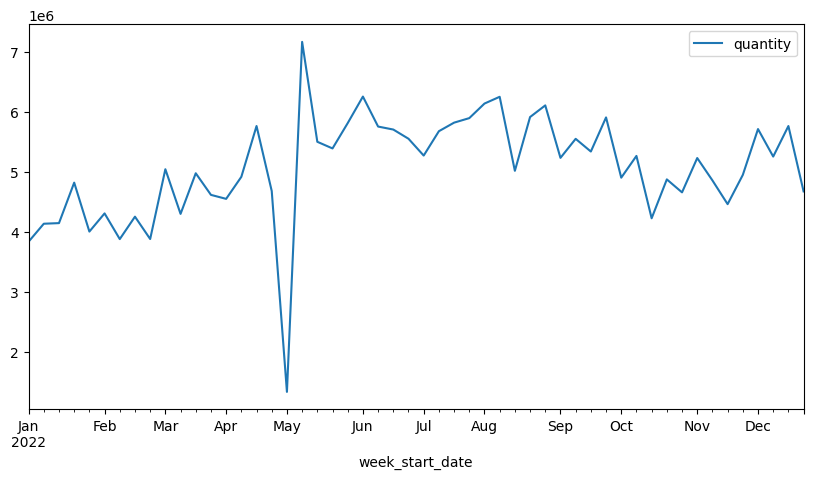

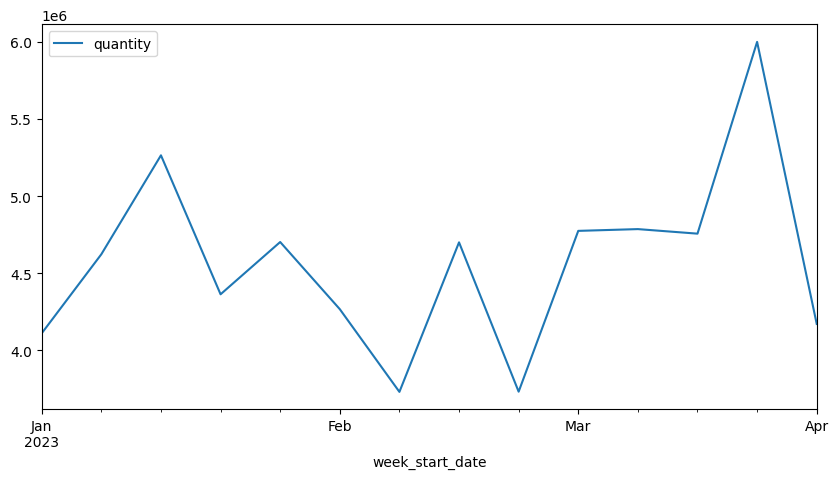

In [103]:
# Visualize by year
colsPlot = ['quantity']
timeFlowSales.loc['2022'][colsPlot].plot(figsize=(10, 5))
timeFlowSales.loc['2023'][colsPlot].plot(figsize=(10, 5))

Dari visualisasi diatas dapat disimpulkan : 
1. Data 2021 tidak digunakan karena hanya terdapat 1 bulan
2. Tanggal 02 May 2022 terjadi penurunan penjualan menjadi `1334134` dari sebelumnya pada tanggal 25 April 2022 sebanyak `4684319`. Hal ini terjadi kemungkinan karena adanya libur bersama Idul Fitri 1443 Hijriah.
3. Awal tahun terjadi tren kenaikan penjualan dikarenakan adanya libur Natal dan Tahun Baru, dan kemungkinan adanya bonus tahunan bagi sebagian karyawan yang berimbas pada kenaikan volume penjualan pada awal tahun

###5.3.2 Weekly - Resampling

In [104]:
# Weekly sales
weekSales = ['quantity']

# Resample weekly sales, aggregating with mean
weekFlowSales = timeFlowSales[weekSales].resample('W').sum()
weekFlowSales

,quantity
week_start_date,
2022-01-02,128808
2022-01-09,3839557
2022-01-16,4138934
2022-01-23,4149077
2022-01-30,4824273
...,...
2023-03-12,4775638
2023-03-19,4787111
2023-03-26,4757590


<Axes: xlabel='week_start_date'>

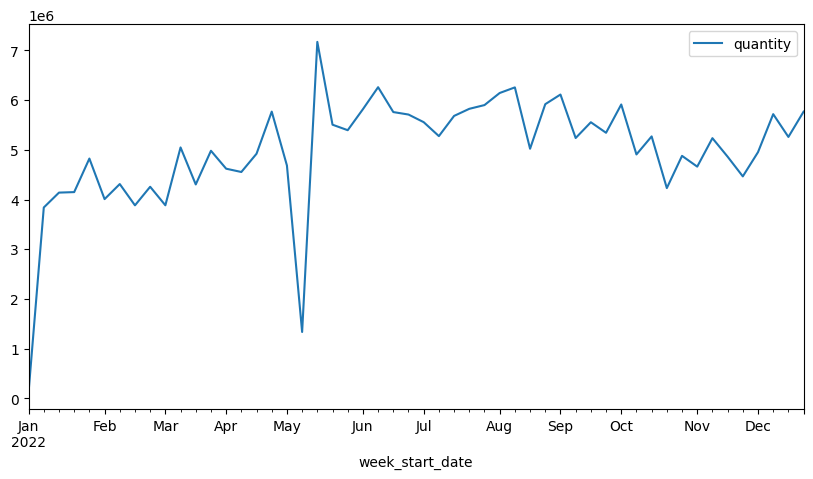

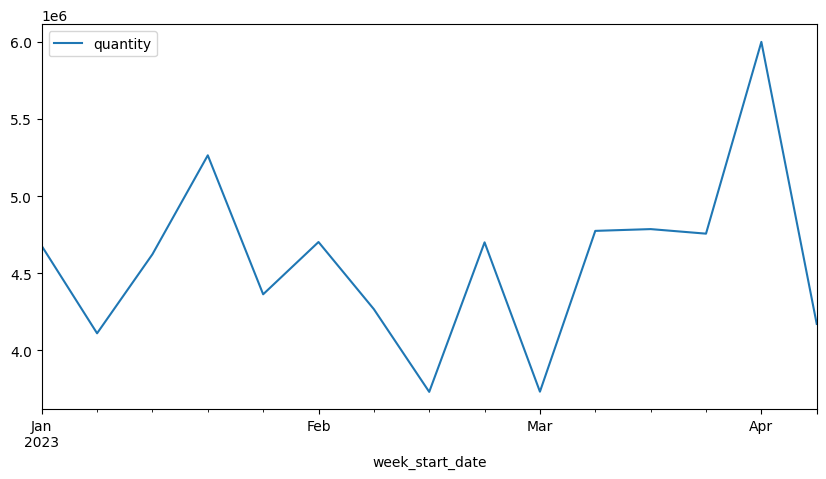

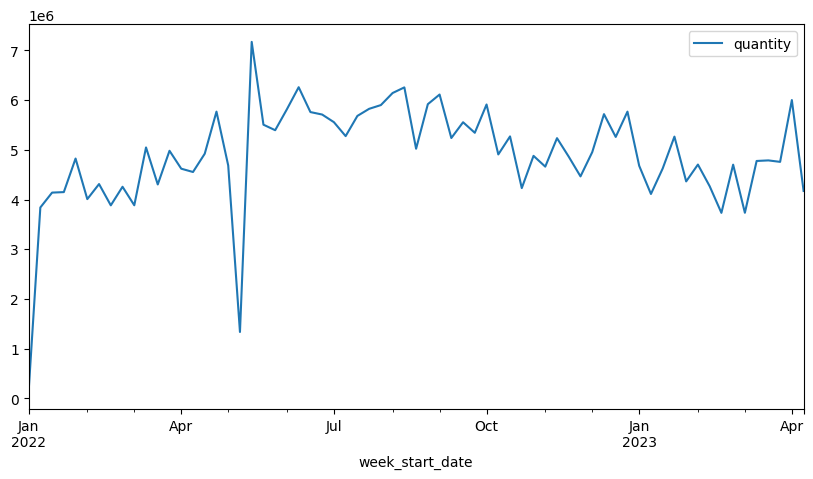

In [105]:
# Visualize weekly sales
weekFlowSales.loc['2022'][colsPlot].plot(figsize=(10, 5))
weekFlowSales.loc['2023'][colsPlot].plot(figsize=(10, 5))
weekFlowSales[colsPlot].plot(figsize=(10, 5))

Dari visualisasi diatas dapat disimpulkan:
1. Tren penjualan mingguan hampir sama dengan trend penjualan tahunan, terjadi kenaikan dan penurunan pada tiap minggunya.
2. Kenaikan terjadi dimana terdapat tanggal yang sama pada bulan berjalan, semisal 1-1, 2-2, 3-3 dan sebagainya pada setiap e-commerce yang memberikan diskon atau bebas ongkos kirim, sehingga semakin menarik minat pembeli untuk melakukan transaksi
3. Dapat dilihat juga, rata-rata kenaikan penjualan terjadi pada pekan ketiga dan keempat dimana sebagian besar karyawan sudah menerima gaji/upah sehingga mereka akan melakukan transaksi, baik via offline maupun e-commerce

### 5.3.3 Monthly - Resampling

In [106]:
# Monthly resampling
monthSales = ['quantity']

# Resampling to monthly frequency, aggregating with mean
monthFlowSales = timeFlowSales[monthSales].resample('M').sum()
monthFlowSales

,quantity
week_start_date,
2021-12-31,128808
2022-01-31,20959868
2022-02-28,16333997
2022-03-31,18952067
2022-04-30,19928123
2022-05-31,25223913
2022-06-30,23286196
2022-07-31,22683481
2022-08-31,29452508


<Axes: xlabel='week_start_date'>

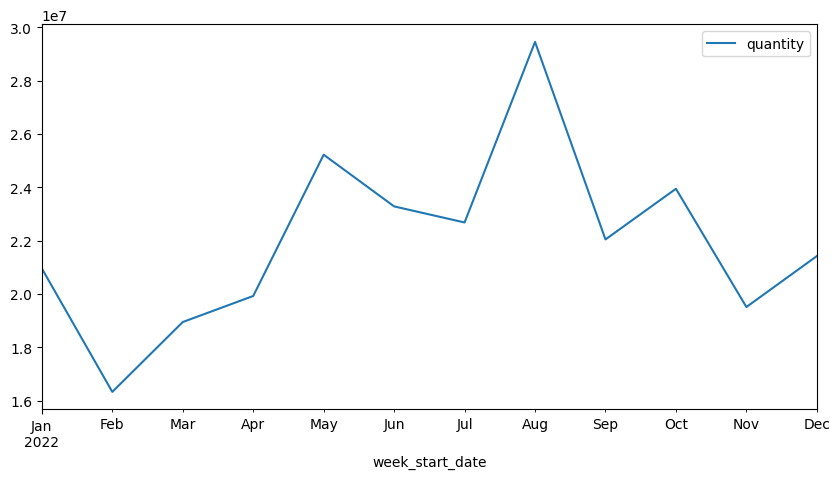

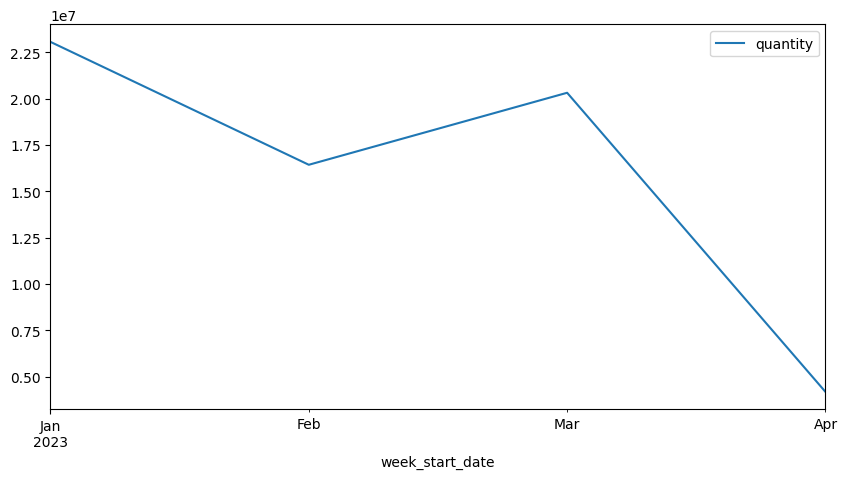

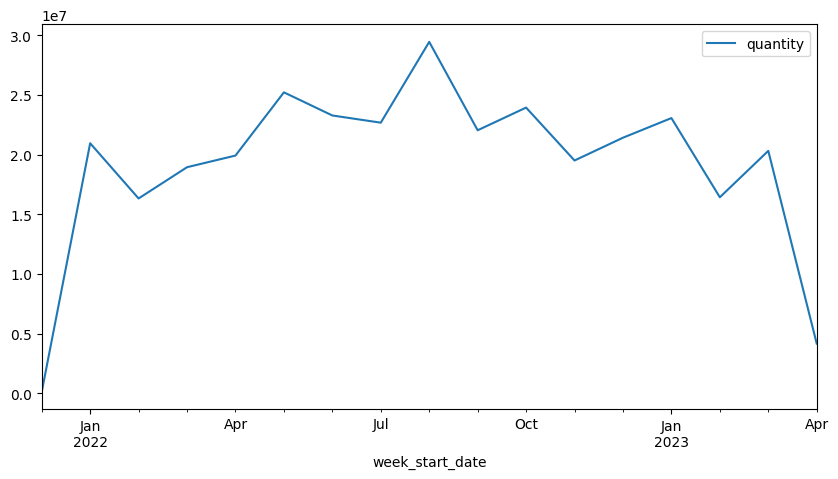

In [107]:
# Visualize monthly resampling
monthFlowSales.loc['2022'][colsPlot].plot(figsize=(10, 5))
monthFlowSales.loc['2023'][colsPlot].plot(figsize=(10, 5))
monthFlowSales[colsPlot].plot(figsize=(10, 5))

Dari visualisasi diatas dapat disimpulkan:
1. Trend penjualan hampir sama dengan tahunan, fluktuatif setiap bulannya.
2. Penjualan terendah pada bulan February 2022 sebanyak 16333997 terjadi mungkin sebagian dana dari konsumen sudah digunakan untuk libur akhir tahun
3. Sementara penjualan tertinggi terjadi di bulan August 2022 dengan total 29452508. Hal ini mungkin bertepatan dengan hari kemerdakaan Indonesia dan banyaknya promo dari e-commerce dan brand ambassador product.

### 5.3.4 Trend Checking

In [108]:
# Function trend checking
def trendCheck(X_df):
  coefficients, residuals, _, _, _ = np.polyfit(range(len(X_df)), X_df, 1, full=True)

  mse = residuals[0]/(len(X_df))
  nrmse = np.sqrt(mse)/(X_df.max() - X_df.min())

  print('='*70)
  print('Slope  : ' + str(coefficients[0]))
  print('NRMSE  : ' + str(nrmse))

  plt.xticks(rotation=90)
  plt.plot(X_df, marker='.', linestyle='-', linewidth=0.5,
           color='blue', label='Original')
    
  plt.plot([coefficients[0]*x + coefficients[1] for x in range(len(X_df))],
           marker='o', markersize=8, linestyle='-', linewidth=0.5,
           color='orange', label='Regression line');
  
  plt.legend()
  plt.show()

Slope  : 319495.9370629371
NRMSE  : 0.2313391001411843


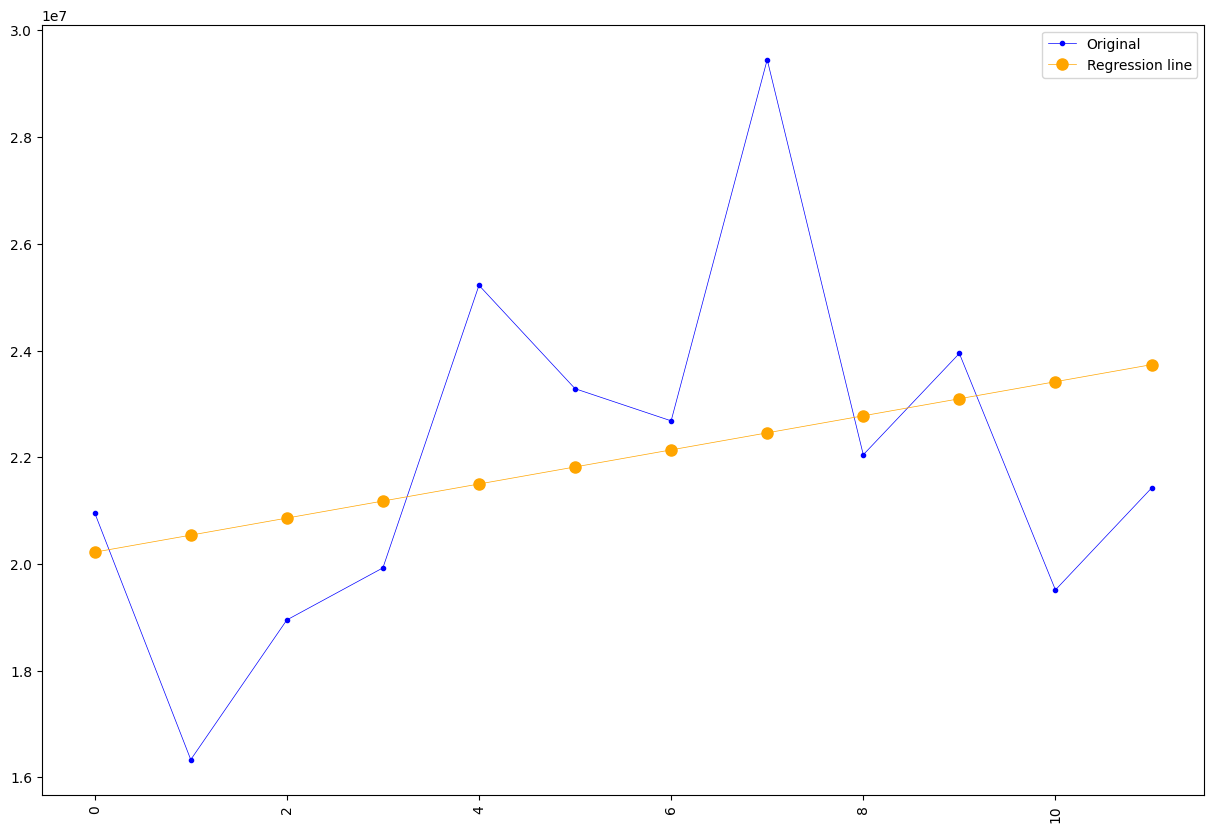

Slope  : -5280253.399999998
NRMSE  : 0.22030897573787028


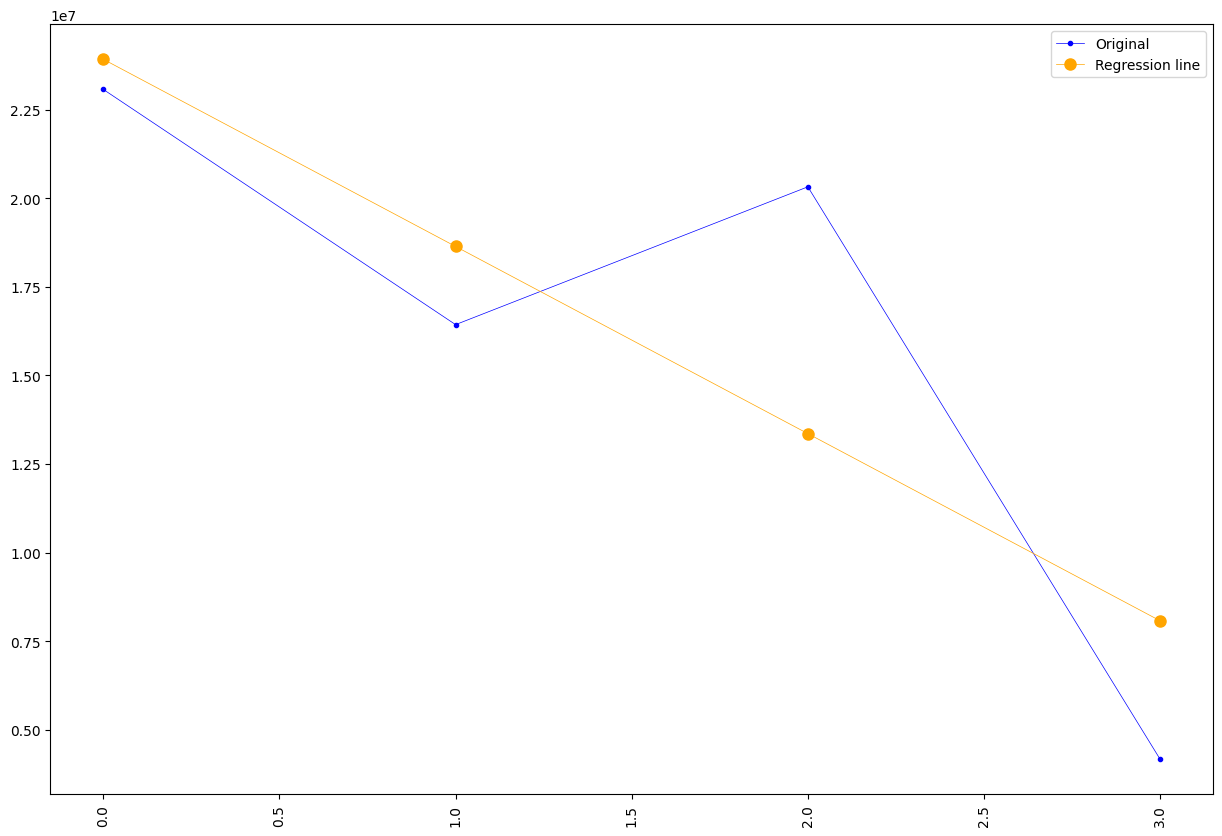

Slope  : [94610.0245098]
NRMSE  : 0.2379210923168305


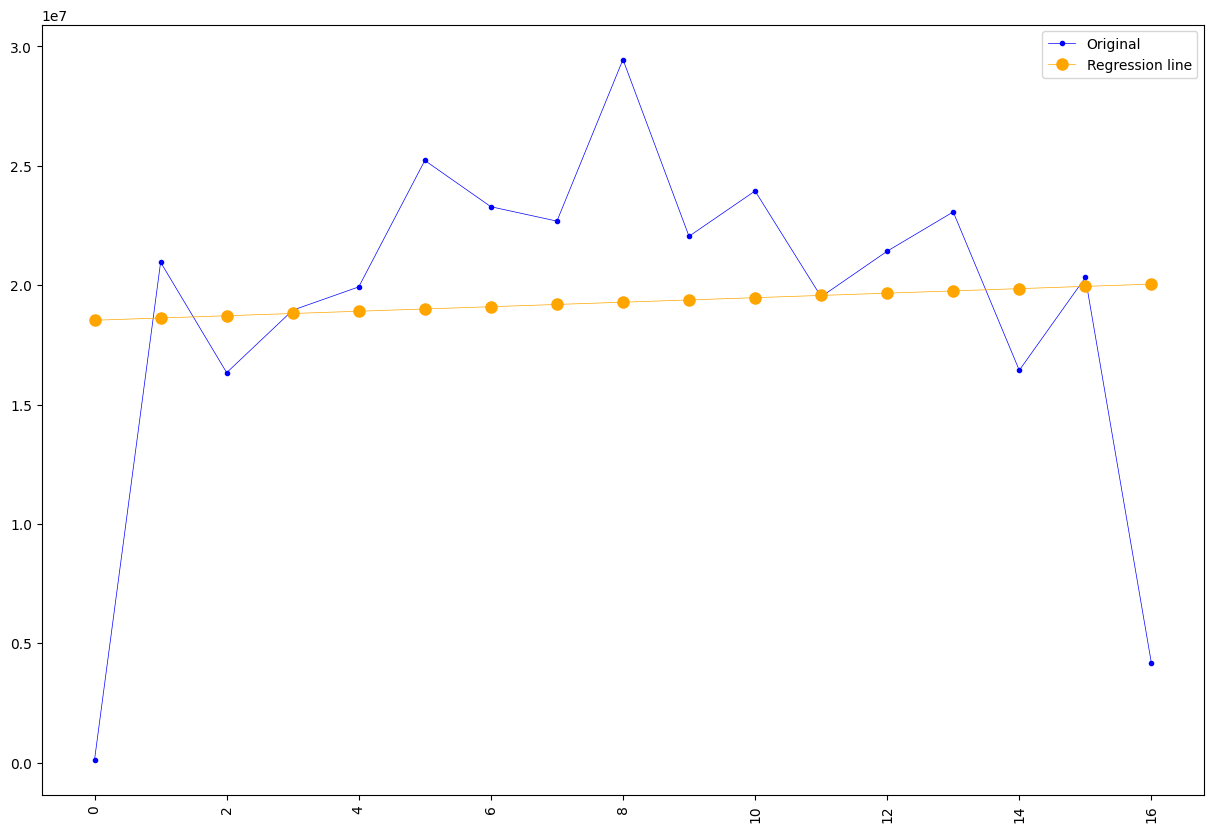

In [109]:
# Trend check
trendCheck(monthFlowSales.loc['2022']['quantity'].values)
trendCheck(monthFlowSales.loc['2023']['quantity'].values)
trendCheck(monthFlowSales[colsPlot].values)

Dari visualisasi diatas dapat disimpulkan:
1. Penjualan produk mengalami peningkatan penjualan
2. Penjualan cenderung menurun jika sedang ada libur hari Raya Idul Fitri maupun event khusus seperti libur kenaikan kelas / penerimaan siswa baru
3. Penjualan bersifat fluktuatif tidak didasari dengan seasonality, kecenderungan penjualan selalu bersifat atas dasar keinginan dari customer untuk memilih produk tersebut.

### 5.3.5 Plot Seasonality

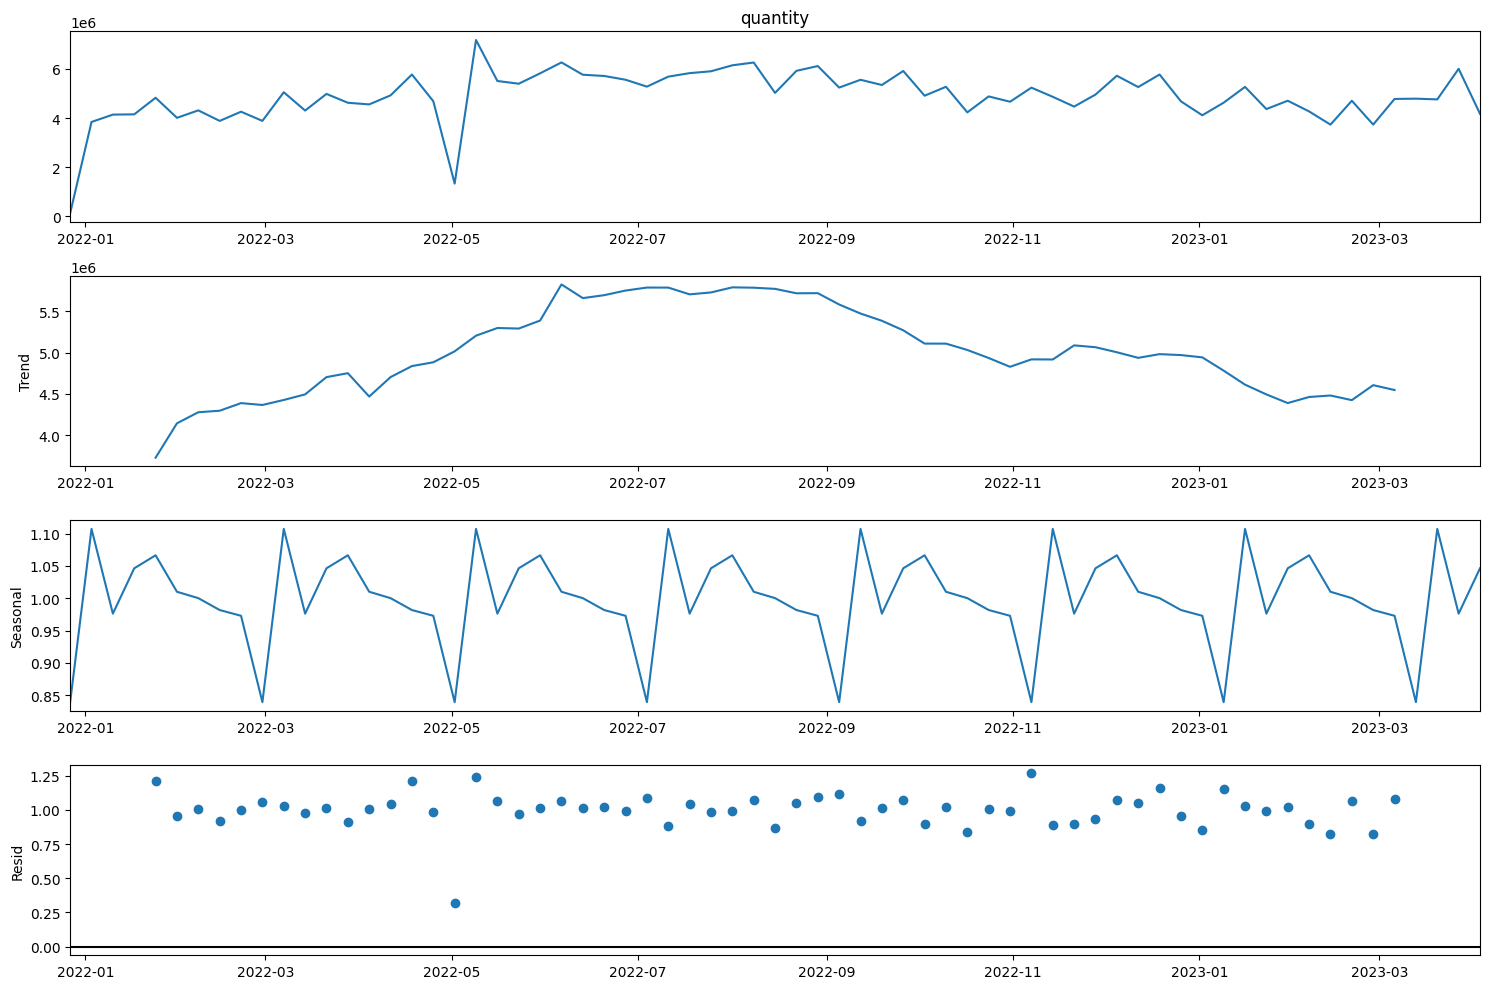

In [110]:
# Seasonality function
pylab.rcParams['figure.figsize'] = (15, 10)
res = seasonal_decompose(timeFlowSales['quantity'], model='multiplicatif', period = 9)
ax = res.plot()
plt.show()

Dari visualisasi seasonality diatas dapat disimpulkan:
1. Penjualan suatu produk bukan merupakan penjualan seasonal, tetapi didasari atas dari keinginan customer karena customer menganggap produk dari ParagonCorp bukan merupakan kebutuhan utama dan perubahan volume penjualan bisa terjadi apabila adanya event-event khusus seperti libur Idul Fitri maupun libur kenaikan kelas/penerimaan siswa baru.
2. Penjualan tertinggi terjadi apabila ada suatu momentum baru semisal mendekati Ramadhan maupun adanya bulan diskon di suatu e-commerce yang memberikan diskon/cashback jika pembelanjaan dengan total tertentu.

# **6. Data Preprocessing**

---

Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

## 6.1 Prepare Data to modeling

In [111]:
# Preparing data
salesData = data.groupby('week_start_date')['quantity'].sum()

# Display
salesData

week_start_date
2021-12-27     128808
2022-01-03    3839557
2022-01-10    4138934
2022-01-17    4149077
2022-01-24    4824273
               ...   
2023-03-06    4775638
2023-03-13    4787111
2023-03-20    4757590
2023-03-27    6001166
2023-04-03    4172070
Name: quantity, Length: 67, dtype: int64

## 6.2 Split data between X and y

In [112]:
# Split data between X and y
window = 4
X = []
y = []

for index in range(0, len(salesData)-window):
  X.append(salesData[index : window + index])
  y.append(salesData[window + index])

X = np.array(X)
y = np.array(y)

# Display
print('Data X : ')
print(X)
print('X Data shape : ', X.shape)
print('='*100)
print('Data y : ')
print(y)
print('X Data shape : ', y.shape)

Data X : 
[[ 128808 3839557 4138934 4149077]
 [3839557 4138934 4149077 4824273]
 [4138934 4149077 4824273 4008027]
 [4149077 4824273 4008027 4311010]
 [4824273 4008027 4311010 3882636]
 [4008027 4311010 3882636 4256541]
 [4311010 3882636 4256541 3883810]
 [3882636 4256541 3883810 5047898]
 [4256541 3883810 5047898 4303200]
 [3883810 5047898 4303200 4980761]
 [5047898 4303200 4980761 4620208]
 [4303200 4980761 4620208 4553719]
 [4980761 4620208 4553719 4921338]
 [4620208 4553719 4921338 5768747]
 [4553719 4921338 5768747 4684319]
 [4921338 5768747 4684319 1334134]
 [5768747 4684319 1334134 7172144]
 [4684319 1334134 7172144 5505616]
 [1334134 7172144 5505616 5394786]
 [7172144 5505616 5394786 5817233]
 [5505616 5394786 5817233 6260083]
 [5394786 5817233 6260083 5759699]
 [5817233 6260083 5759699 5709933]
 [6260083 5759699 5709933 5556481]
 [5759699 5709933 5556481 5275889]
 [5709933 5556481 5275889 5682207]
 [5556481 5275889 5682207 5824993]
 [5275889 5682207 5824993 5900392]
 [5682207 

## 6.3 Combine X and y into dataframe

In [113]:
# Combines `X` and `y` into DataFrame
X_y_Df = pd.concat([pd.DataFrame(X, columns=['X0', 'X1', 'X2', 'X3']), pd.DataFrame(y, columns=['y'])], axis=1)

# Display
X_y_Df

,X0,X1,X2,X3,y
0,128808,3839557,4138934,4149077,4824273
1,3839557,4138934,4149077,4824273,4008027
2,4138934,4149077,4824273,4008027,4311010
3,4149077,4824273,4008027,4311010,3882636
4,4824273,4008027,4311010,3882636,4256541
...,...,...,...,...,...
58,4267946,3731588,4701262,3732954,4775638
59,3731588,4701262,3732954,4775638,4787111
60,4701262,3732954,4775638,4787111,4757590
61,3732954,4775638,4787111,4757590,6001166


## 6.4 Splitting Dataset

In [114]:
# Split dataset
trainSize = round(len(X) * 0.8)

# Train-set
X_train = X[:trainSize]
y_train = y[:trainSize]

# Test-set
X_test = X[trainSize:]
y_test = y[trainSize:]

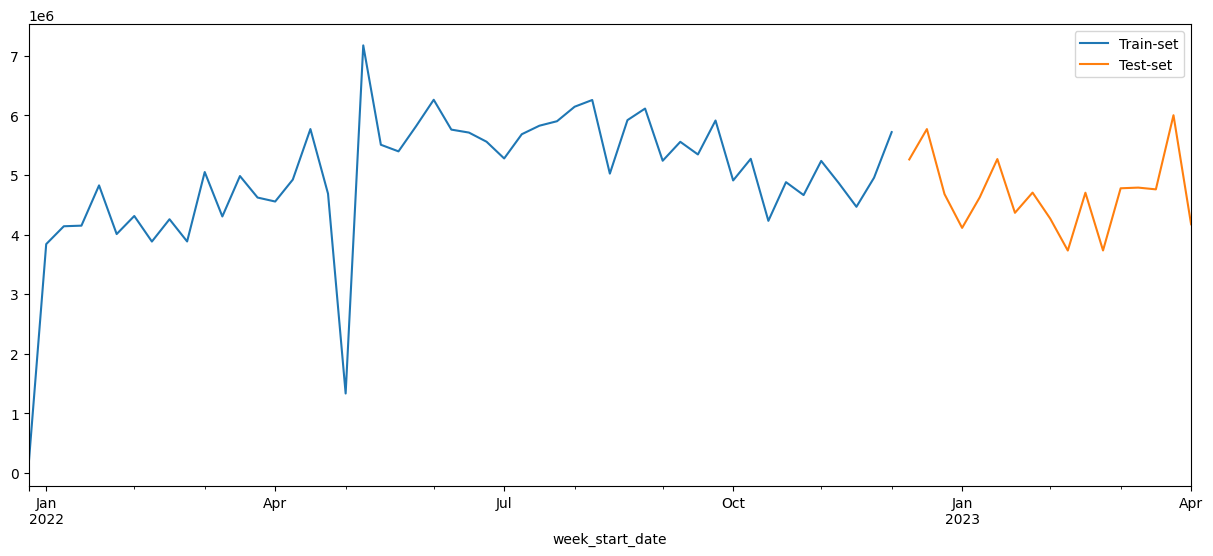

In [115]:
# Visualize data after splitting
salesData[:trainSize].plot.line(figsize=(15, 6))
salesData[trainSize:].plot.line(figsize=(15, 6))
plt.legend(['Train-set', 'Test-set'])
plt.show()

Data train-set sebesar 80% dan test-set sebesar 20%

## 6.5 Scaling

In [116]:
# Scaling data using MinMaxScaller
scaler = MinMaxScaler()

# Applying
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Display
X_train

array([[0.        , 0.42915702, 0.48043768, 0.48217509],
       [0.52684538, 0.48043768, 0.48217509, 0.59783025],
       [0.56935038, 0.48217509, 0.59783025, 0.45801446],
       [0.57079046, 0.59783025, 0.45801446, 0.5099128 ],
       [0.66665356, 0.45801446, 0.5099128 , 0.43653608],
       [0.55076444, 0.5099128 , 0.43653608, 0.50058273],
       [0.59378141, 0.43653608, 0.50058273, 0.43673718],
       [0.53296165, 0.50058273, 0.43673718, 0.63613526],
       [0.586048  , 0.43673718, 0.63613526, 0.50857501],
       [0.53312834, 0.63613526, 0.50857501, 0.62463528],
       [0.69840343, 0.50857501, 0.62463528, 0.56287571],
       [0.59267256, 0.62463528, 0.56287571, 0.55148672],
       [0.68887144, 0.56287571, 0.55148672, 0.61445664],
       [0.63768078, 0.55148672, 0.61445664, 0.75961038],
       [0.62824079, 0.61445664, 0.75961038, 0.57385736],
       [0.68043467, 0.75961038, 0.57385736, 0.        ],
       [0.80074825, 0.57385736, 0.        , 1.        ],
       [0.64678314, 0.        ,

# **7 - Model Definition**

---

Bagian ini berisi cell untuk mendefinisikan model. Jelaskan alasan menggunakan suatu algoritma/model, hyperparameter yang dipakai, jenis penggunaan metrics yang dipakai, dan hal lain yang terkait dengan model.

Model-model yang akan digunakan kali ini adalah **Linear Regression, Random Forest Regression, Support Vector Machine, XG-Boost, ARIMA Model, Naive Approach dan Moving Average Forecast.** Kemudian akan dibandingkan model mana saja yang memiliki performa yang baik. Metrics penentuan performa menggunakan **MAE (Mean Absolute Error)** karena **MAE** ini merupakan nilai error rata-rata kesalahan absolute antara nilai actual dan nilai prediksi dari suatu model. Dan ditambah dengan nilai **RMSE (Root Mean Squared Error)** untuk mensupport nilai dari MAE, karena nilai **RMSE** adalah nilai **MAE** yang dikuadratkan.

## 7.1 Linear Regression

In [117]:
%%time
# Clear session
seed = 19
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

# Define linear regression model
linReg = LinearRegression(fit_intercept=False, n_jobs=1)
linReg.fit(X_train, y_train)

# Applying predict
y_predTrainLR = linReg.predict(X_train)
y_predTestLR = linReg.predict(X_test)

# MAE checking
maeTrainLR = round(mean_absolute_error(y_train, y_predTrainLR), 2)
rmseTrainLR = round(sqrt(mean_squared_error(y_train, y_predTrainLR)), 2)
maeTestLR = round(mean_absolute_error(y_test, y_predTestLR), 2)
rmseTestLR = round(sqrt(mean_squared_error(y_test, y_predTestLR)), 2)

# Display MAE and RMSE
print('MAE - Train-set - Linear Regression  :', maeTrainLR)
print('RMAE - Train-set - Linear Regression :', rmseTrainLR)
print('MAE - Test-set - Linear Regression   :', maeTestLR)
print('RMSE - Test-set - Linear Regression  :', rmseTestLR)

MAE - Train-set - Linear Regression  : 622142.3
RMAE - Train-set - Linear Regression : 939250.73
MAE - Test-set - Linear Regression   : 622649.22
RMSE - Test-set - Linear Regression  : 724880.03
CPU times: user 9.3 ms, sys: 675 µs, total: 9.98 ms
Wall time: 9.98 ms


In [118]:
# Combining prediction of linear regression
y_predLR = np.concatenate([np.array([0, 0, 0, 0]), y_predTrainLR, y_predTestLR], axis=0)

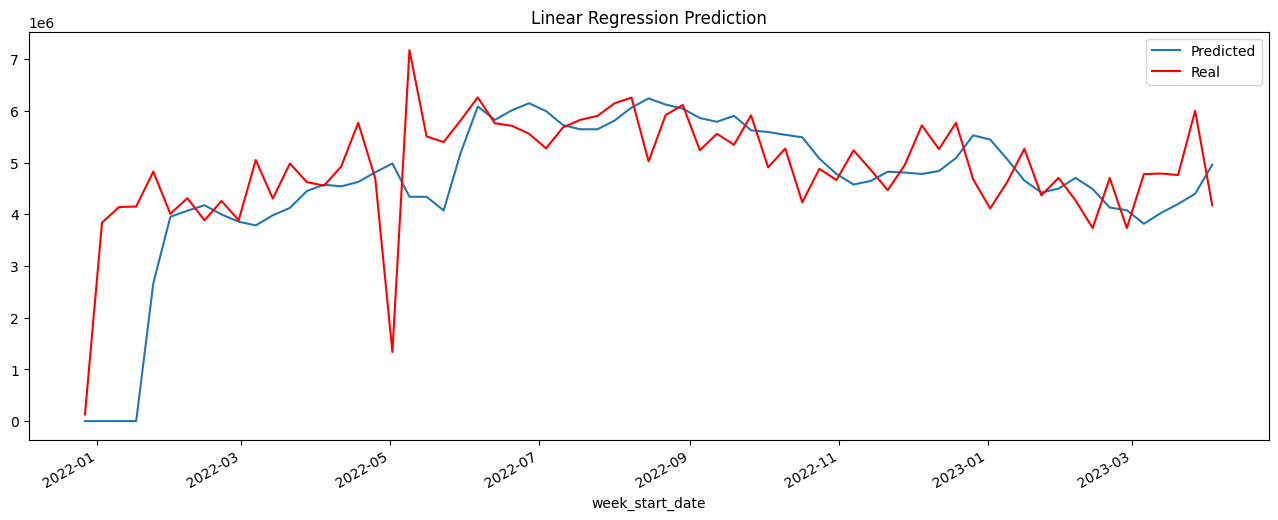

In [119]:
# Visualize trend using linear regression
plt.figure(figsize=(16, 6))
plt.plot(salesData.index, y_predLR, label='Predicted')
salesData.plot(color='Red', label='Real')
plt.title('Linear Regression Prediction')
plt.legend()
plt.show()

Dari grafik linear regression, model dapat dengan baik mengikuti pola trend penjualan yang terjadi dengan baik meskipun tingkat MAE dari model masih cukup besar di angka 622649.22. yang berarti toleransi model terhadap aktual ada diangka 622649.22.

## 7.2 Random Forest Regression

In [120]:
%%time
# Clear session
seed = 19
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

# Define Random Forest Regression model
randFor = RandomForestRegressor(n_estimators=400, random_state=19, 
                                max_features='sqrt', warm_start=False,
                                criterion='absolute_error')
randFor.fit(X_train, y_train)

# Applying predict
y_predTrainRF = randFor.predict(X_train)
y_predTestRF = randFor.predict(X_test)

# MAE checking
maeTrainRF = round(mean_absolute_error(y_train, y_predTrainRF), 2)
rmseTrainRF = round(sqrt(mean_squared_error(y_train, y_predTrainRF)), 2)
maeTestRF = round(mean_absolute_error(y_test, y_predTestRF), 2)
rmseTestRF = round(sqrt(mean_squared_error(y_test, y_predTestRF)), 2)

# Display MAE and RMSE
print('MAE - Train-set - Random Forest Regression  :', maeTrainRF)
print('RMAE - Train-set - Random Forest Regression :', rmseTrainRF)
print('MAE - Test-set - Random Forest Regression   :', maeTestRF)
print('RMSE - Test-set - Random Forest Regression  :', rmseTestRF)

MAE - Train-set - Random Forest Regression  : 226834.12
RMAE - Train-set - Random Forest Regression : 309291.17
MAE - Test-set - Random Forest Regression   : 593009.2
RMSE - Test-set - Random Forest Regression  : 754309.51
CPU times: user 861 ms, sys: 4.85 ms, total: 866 ms
Wall time: 933 ms


In [121]:
# Combining prediction of Random Forest Regressor
y_predRF = np.concatenate([np.array([0, 0, 0, 0]), y_predTrainRF, y_predTestRF], axis=0)

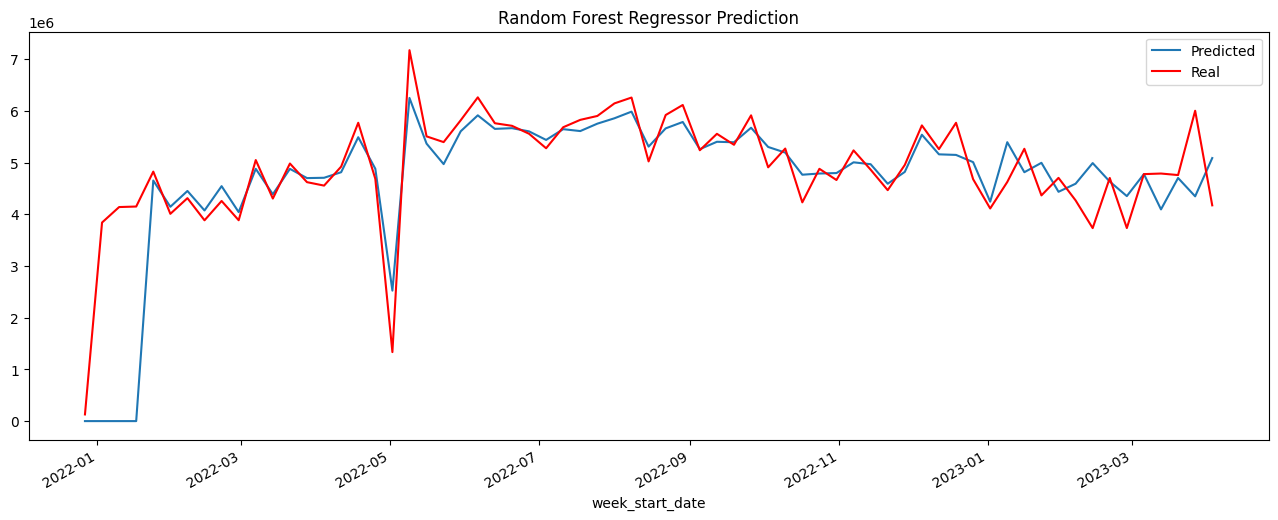

In [122]:
# Visualize trend of Random Forest Regressor
plt.figure(figsize=(16, 6))
plt.plot(salesData.index, y_predRF, label='Predicted')
salesData.plot(color='Red', label='Real')
plt.title('Random Forest Regressor Prediction')
plt.legend()
plt.show()

Model Random Forest Regression hampir cukup baik dan mendekat pola-pola penjualan aktual, dimana angka MAE yang didapat model sebesar 593009.2, angka ini masih dibawah dari model Linear Regression

## 7.3 Support Vector Machine

In [123]:
%%time
# Clear session
seed = 19
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

# Define SVM Regression
SVM = SVR(kernel='poly', degree=7, C=0.5)
SVM.fit(X_train, y_train)

# Applying predict
y_predTrainSVM = SVM.predict(X_train)
y_predTestSVM = SVM.predict(X_test)

# MAE checking
maeTrainSVM = round(mean_absolute_error(y_train, y_predTrainSVM), 2)
rmseTrainSVM = round(sqrt(mean_squared_error(y_train, y_predTrainSVM)), 2)
maeTestSVM = round(mean_absolute_error(y_test, y_predTestSVM), 2)
rmseTestSVM = round(sqrt(mean_squared_error(y_test, y_predTestSVM)), 2)

# Display MAE and RMSE
print('MAE - Train-set - Support Vector Regression  :', maeTrainSVM)
print('RMAE - Train-set - Support Vector Regression :', rmseTrainSVM)
print('MAE - Test-set - Support Vector Regression   :', maeTestSVM)
print('RMSE - Test-set - Support Vector Regression  :', rmseTestSVM)

MAE - Train-set - Support Vector Regression  : 398143.85
RMAE - Train-set - Support Vector Regression : 685372.94
MAE - Test-set - Support Vector Regression   : 494387.9
RMSE - Test-set - Support Vector Regression  : 634047.28
CPU times: user 48.2 ms, sys: 841 µs, total: 49 ms
Wall time: 53.4 ms


In [124]:
# Concate prediction of SVM
y_predSVM = np.concatenate([np.array([0, 0, 0, 0]), y_predTrainSVM, y_predTestSVM], axis=0)

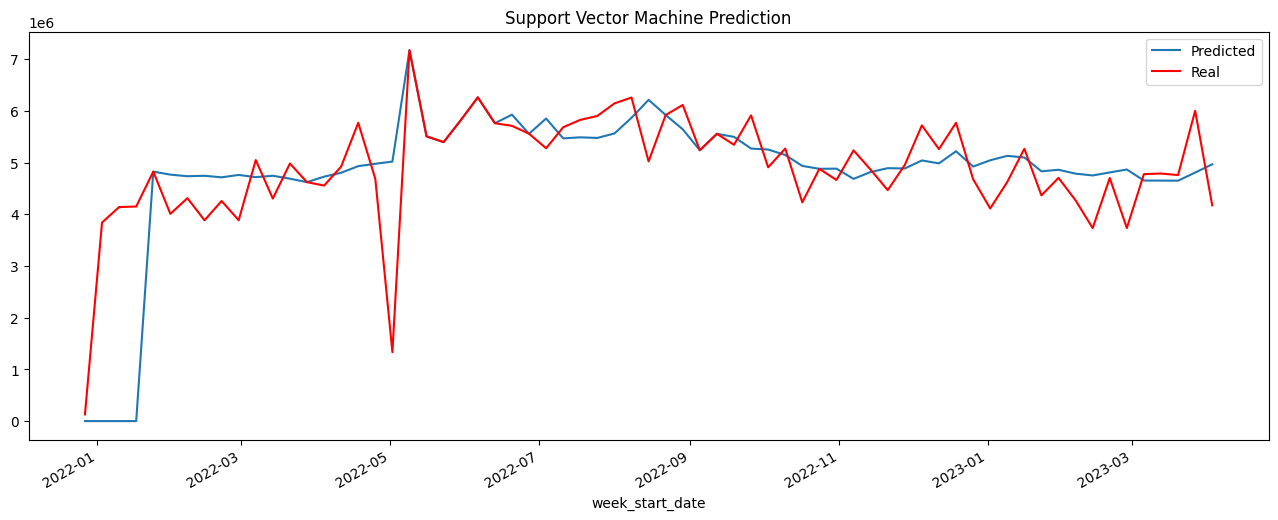

In [125]:
# Visualize trend of Support Vector Machine
plt.figure(figsize=(16, 6))
plt.plot(salesData.index, y_predSVM, label='Predicted')
salesData.plot(color='Red', label='Real')
plt.title('Support Vector Machine Prediction')
plt.legend()
plt.show()

Meskipun model tidak cukup baik melihat trend penjualan aktual, namun model SVM ini memiliki angka MAE yang cukup kecil dibanding Linear Regression maupun Random Forest, yaitu sebesar 494387.9

## 7.4 ARIMA

In [126]:
# Prepare data for ARIMA
salesArima = data.groupby('week_start_date', as_index=False)['quantity'].sum()
salesArima.columns=['date', 'quantity']
salesArima.date = pd.to_datetime(salesArima.date)
salesArima.set_index('date', inplace=True)

# Splitting
train = salesArima[:50]
test = salesArima[50:]

In [127]:
# Check dataset stationer
def check_stationarity(series):
  
    result = adfuller(series.values)

    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if (result[1] <= 0.05) & (result[4]['5%'] > result[0]):
        print("\u001b[32mStationary\u001b[0m")
    else:
        print("\x1b[31mNon-stationary\x1b[0m")

ADF Statistic: -3.328821
p-value: 0.013638
Critical Values:
	1%: -3.537
	5%: -2.908
	10%: -2.591
Stationary


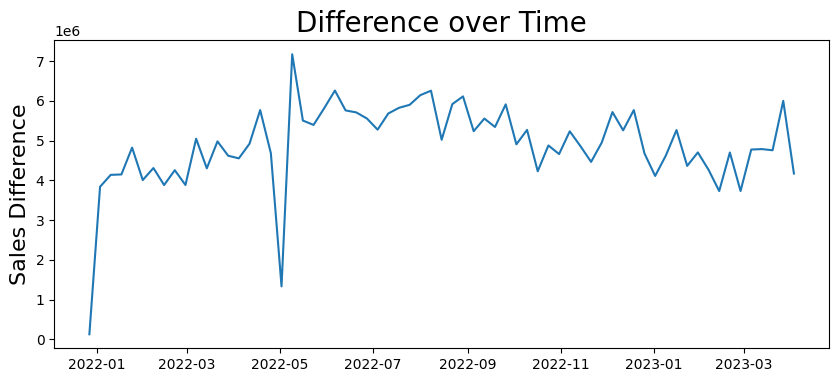

In [128]:
# Apply function

check_stationarity(salesArima)
plt.figure(figsize=(10,4))
plt.plot(salesArima)
plt.title('Difference over Time', fontsize=20)
plt.ylabel('Sales Difference', fontsize=16)
plt.show()
     

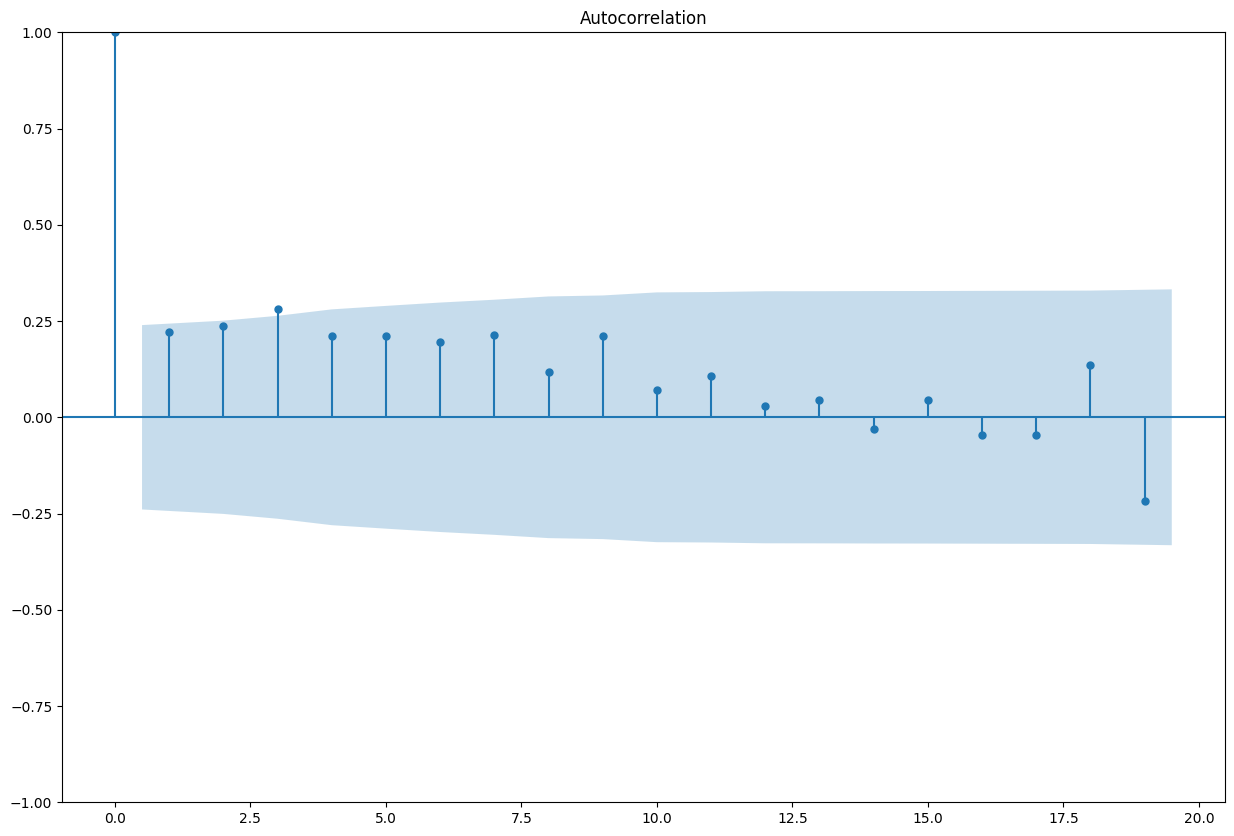

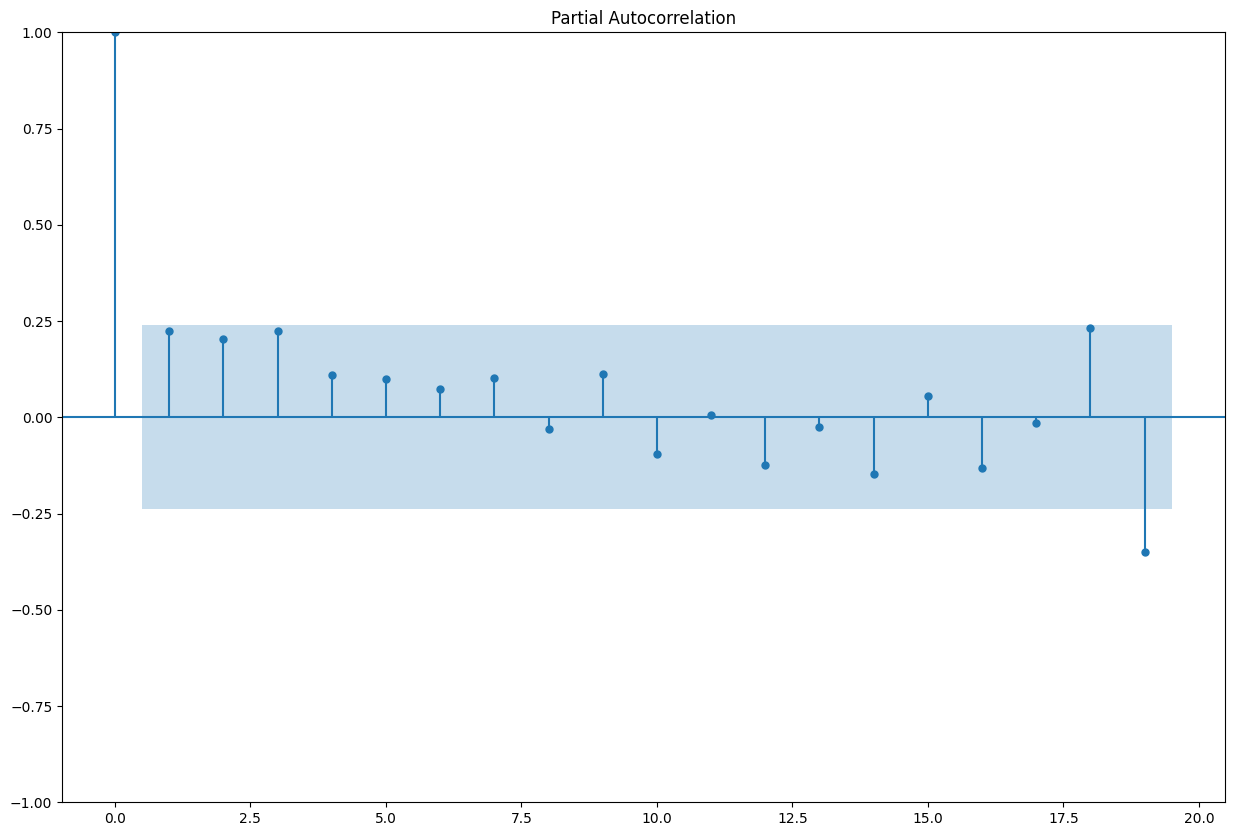

In [129]:
# Ploting ACF and PACF
plot_acf(salesArima)
plot_pacf(salesArima)
plt.show()

Dapat dilihat dari visualisasi ACF dan PACF diatas, dataset sudah stationer pada lags ke 0 dan sudah berkorelasi pada lags ke 0 pula. Dapat dikatakan ACF cut-off ke-0, PACF tail-off ke-0

In [130]:
# Define ARIMA model
arima = ARIMA(salesArima['quantity'], order=(0, 0, 0), seasonal_order=(0, 0, 0, 4))
arima = arima.fit()
print('AIC is : ', arima.aic)

AIC is :  2265.9494346194415


In [131]:
# Generate prediction with ARIMA model
predArima = arima.forecast(steps=len(test)+4)

# Display
predArima

2023-04-10    4.893709e+06
2023-04-17    4.893709e+06
2023-04-24    4.893709e+06
2023-05-01    4.893709e+06
2023-05-08    4.893709e+06
2023-05-15    4.893709e+06
2023-05-22    4.893709e+06
2023-05-29    4.893709e+06
2023-06-05    4.893709e+06
2023-06-12    4.893709e+06
2023-06-19    4.893709e+06
2023-06-26    4.893709e+06
2023-07-03    4.893709e+06
2023-07-10    4.893709e+06
2023-07-17    4.893709e+06
2023-07-24    4.893709e+06
2023-07-31    4.893709e+06
2023-08-07    4.893709e+06
2023-08-14    4.893709e+06
2023-08-21    4.893709e+06
2023-08-28    4.893709e+06
Freq: W-MON, Name: predicted_mean, dtype: float64

In [132]:
# Evaluate MAE of ARIMA model
maeArima = mean_absolute_error(predArima[:17], test)
rmseArima = sqrt(mean_squared_error(predArima[:17], test))
print(f'MAE of ARIMA  : {maeArima}')
print(f'RSME of ARIMA : {rmseArima}')

MAE of ARIMA  : 525320.1615452158
RSME of ARIMA : 641789.983815685


MAE yang didapat oleh ARIMA model masih cukup besar yaitu 525320.16 dan model pun hanya mampu memprediksi penjualan pada pekan selanjutnya di angka 4893709. 

## 7.5 Naive Approach

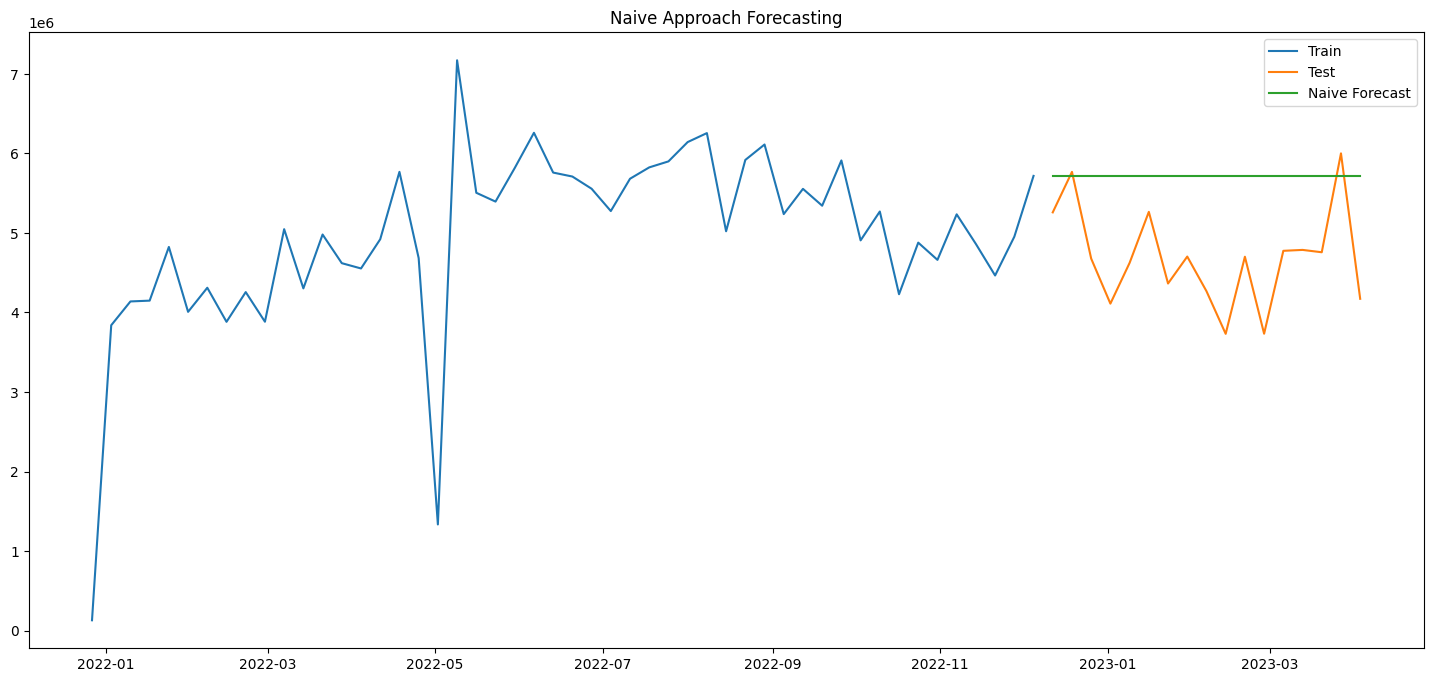

In [133]:
# Define naive approach forecasting
dd = np.asarray(train.quantity)
y_hat = test.copy()
y_hat['naive'] = dd[len(dd) - 1]

# Visualize the trend
plt.figure(figsize=(18, 8))
plt.plot(train.index, train['quantity'], label='Train')
plt.plot(test.index, test['quantity'], label='Test')
plt.plot(y_hat.index, y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title('Naive Approach Forecasting')
plt.show()

In [134]:
# Find scoring for naive approach
maeNaive = round(mean_absolute_error(test.quantity, y_hat.naive), 2)
rmseNaive = round(sqrt(mean_squared_error(test.quantity, y_hat.naive)), 2)

# MAE and RMSE check
print('MAE - Naive Approach   : ', maeNaive)
print('RMSE - Naive Approach  : ', rmseNaive)

MAE - Naive Approach   :  1068829.94
RMSE - Naive Approach  :  1195706.62


Model naive approach memiliki nilai MAE diatas angka 1 juta produk, hal ini cukup besar yang kemungkinan akan mempengaruhi life cycle dari produk dan akan menimbulkan efek domino yang akan cukup merugikan perusahaan

## 7.6 Moving Average Forecast

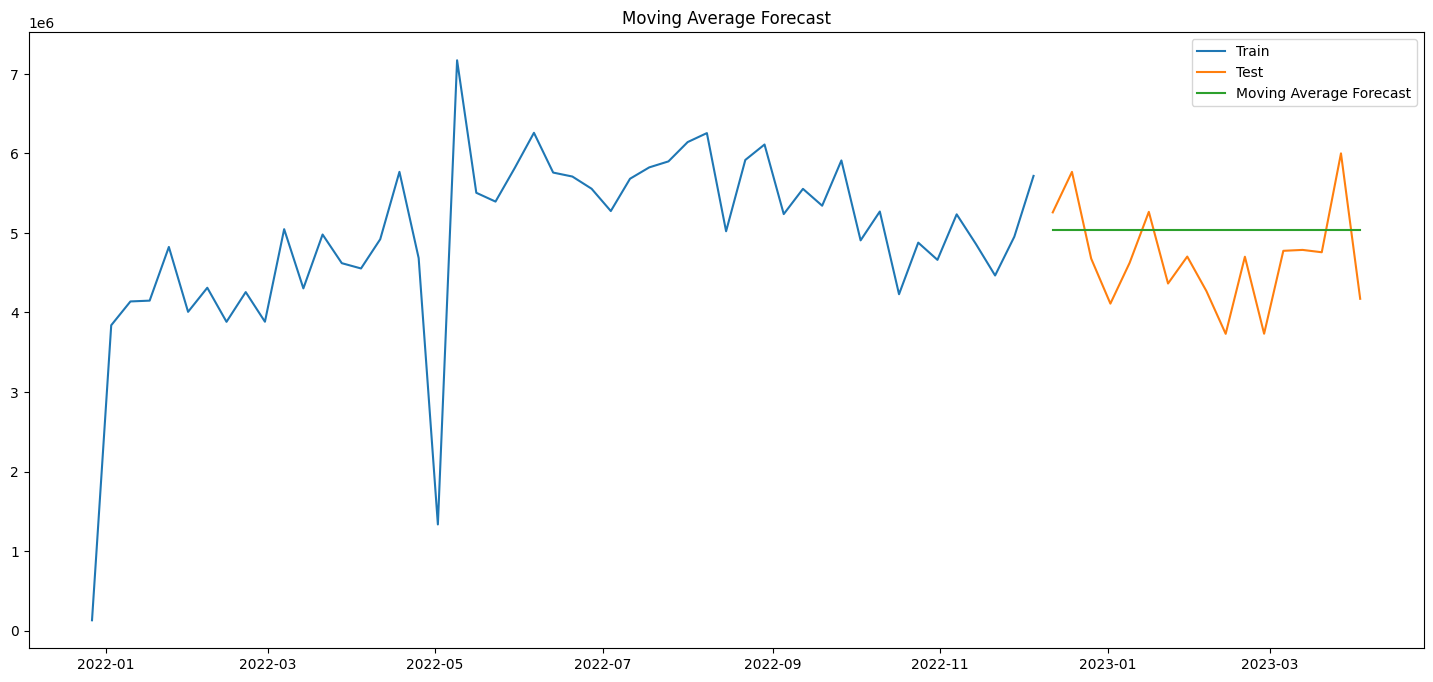

In [135]:
# Define moving average forecast
y_hatAvg = test.copy()
y_hatAvg['moving_avg_forecast'] = train.quantity.rolling(12).mean().iloc[-1]

# Visualize the trend
plt.figure(figsize=(18, 8))
plt.plot(train.quantity, label='Train')
plt.plot(test.quantity, label='Test')
plt.plot(y_hatAvg.index, y_hatAvg['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.title('Moving Average Forecast')
plt.show()

In [136]:
# Find scoring for naive approach
maeAvg = round(mean_absolute_error(test.quantity, y_hatAvg.moving_avg_forecast), 2)
rmseAvg = round(sqrt(mean_squared_error(test.quantity, y_hatAvg.moving_avg_forecast)), 2)

# MAE and RMSE check
print('MAE - Moving Average Forecast   : ', maeAvg)
print('RMSE - Moving Average Forecast  : ', rmseAvg)

MAE - Moving Average Forecast   :  600798.47
RMSE - Moving Average Forecast  :  700556.75


Untuk Moving Average Forecast sudah cukup baik dimana tolerensi MAE yang didapat hanya sebesar 600798.47.

##7.7 XG-Boost

In [137]:
%%time
# Clear session
seed = 19
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

# Define XGBoost model
xgb = XGBRegressor()
xgbParams = {'n_estimators':[100, 300, 500, 900],
             'learning_rate':[0.01, 0.1, 1],
             'max_depth':[5, 7, 9]}
xgbModel = GridSearchCV(estimator=xgb, param_grid=xgbParams, cv=7, scoring='neg_mean_absolute_error')
xgbModel.fit(X_train, y_train)

# Applying predict
y_predTrainXGB = xgbModel.predict(X_train)
y_predTestXGB = xgbModel.predict(X_test)

# MAE checking
maeTrainXGB = round(mean_absolute_error(y_train, y_predTrainXGB), 2)
rmseTrainXGB = round(sqrt(mean_squared_error(y_train, y_predTrainXGB)), 2)
maeTestXGB = round(mean_absolute_error(y_test, y_predTestXGB), 2)
rmseTestXGB = round(sqrt(mean_squared_error(y_test, y_predTestXGB)), 2)

# Display MAE and RMSE
print('MAE - Train-set - XG-Boost  :', maeTrainXGB)
print('RMAE - Train-set - XG-Boost :', rmseTrainXGB)
print('MAE - Test-set - XG-Boost   :', maeTestXGB)
print('RMSE - Test-set - XG-Boost  :', rmseTestXGB)

MAE - Train-set - XG-Boost  : 7344.9
RMAE - Train-set - XG-Boost : 13778.99
MAE - Test-set - XG-Boost   : 671631.08
RMSE - Test-set - XG-Boost  : 851192.23
CPU times: user 1min 12s, sys: 3.03 s, total: 1min 15s
Wall time: 1min 3s


In [138]:
# Combining prediction of xgb-regressor
y_predXGB = np.concatenate([np.array([0, 0, 0, 0]), y_predTrainXGB, y_predTestXGB], axis=0)

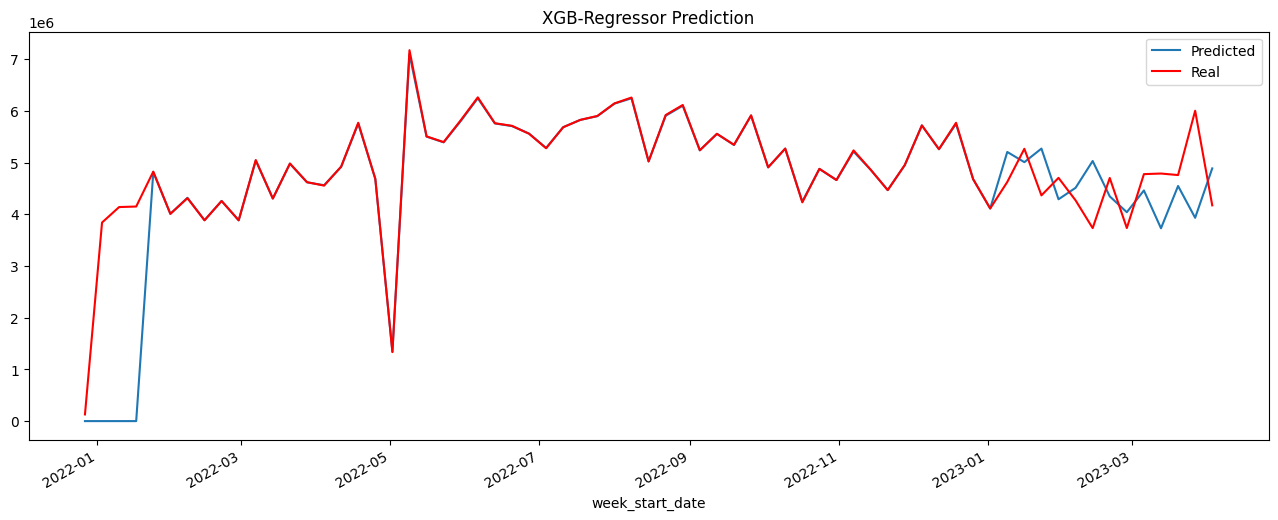

In [139]:
# Visualize trend using xgb-regressor
plt.figure(figsize=(16, 6))
plt.plot(salesData.index, y_predXGB, label='Predicted')
salesData.plot(color='Red', label='Real')
plt.title('XGB-Regressor Prediction')
plt.legend()
plt.show()

Meskipun dari grafik, model XGBoost regressor sudah dapat dengan baik melihat pola-pola penjualan namun masih memiliki angka MAE yang cukup besar dibanding model-model sebelumnya, yaitu diangka 671631.08.

# **8 - Model Evaluation**

---

Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model. Lakukan analisis terkait dengan hasil pada model dan tuliskan hasil analisisnya.

In [140]:
# Evaluate the model
evaluateDF = pd.DataFrame({
    'Model' : ['Linear Regression', 'Random Forest Regressor', 'Support Vector Machine', 'ARIMA',
               'Naive Approach Forecast', 'Moving Average Forecast', 'XGBoost'],
    'MAE' : [maeTestLR, maeTestRF, maeTestSVM, maeArima, maeNaive, maeAvg, maeTestXGB],
    'RMSE' : [rmseTestLR, rmseTestRF, rmseTestSVM, rmseArima, rmseNaive, rmseAvg, rmseTestXGB]
})

# Display
evaluateDF = evaluateDF.sort_values('MAE', ascending=True)
evaluateDF

,Model,MAE,RMSE
2,Support Vector Machine,4.943879e+05,6.340473e+05
3,ARIMA,5.253202e+05,6.417900e+05
1,Random Forest Regressor,5.930092e+05,7.543095e+05
5,Moving Average Forecast,6.007985e+05,7.005568e+05
0,Linear Regression,6.226492e+05,7.248800e+05
6,XGBoost,6.716311e+05,8.511922e+05
4,Naive Approach Forecast,1.068830e+06,1.195707e+06


Dari tabel diatas dapat dilihat untuk nilai **MAE** dan didukung nilai **RMSE** model **Support Vector Regresion** menduduki peringkat pertama dengan nilai terendah diantara model yang lain, maka dengan ini saya menggunakan model tersebut untuk digunakan dalam model Inference

# **9 - Model Saving**

---


In [141]:
# Saving the model
with open('Scaling.pkl', 'wb') as file1:
  pickle.dump(scaler, file1)

with open('SVMModel.pkl', 'wb') as file1:
  pickle.dump(SVM, file1)

# **10 - Pengambilan Kesimpulan**

---


Pada bagian terakhir ini, harus berisi kesimpulan yang mencerminkan hasil yang didapat dengan objective yang sudah ditulis di bagian pengenalan.

Kesimpulan:
1. Model yang dipilih adalah model Support Vector Regresion karena memiliki nilai MAE sebesar 494387.9 terhadap data test. Hal ini dilakukan karena performa model terhadap data yang belum pernah dilatih sama sekali dan mendapatkan nilai performa yang cukup baik diantara model-model yang lain
2. Dari sisi perusahaan, jika model ini bisa diterapkan nantinya maka harus ada toleransi antara aktual dan prediksi sebesar lebih kurang 500 ribu produk. Hal ini bisa diantisipasi dengan adanya melihat trend-trend yang sudah terjadi sebelumnya. Apakah di pekan-pekan selanjutnya ada acara khusus atau tidak, atau apakah adanya libur/cuti bersama yang menyebabkan adanya perpindahan arus ekonomi kedaerah yang memiliki destinasi wisata.
3. Kontrol stock barang di gudang pun harus diperhatikan agar tidak adanya overstock, jika adanya prediksi melebihi aktual sedangkan kekurangan stock jika ternyata prediksi dibawah dari aktual.
4. SVM model dapat dengan baik mengikuti pola-pola penjualan aktual dengan range MAE dikisaran 500 ribuan, hal ini juga perlu diperhatikan untuk membuat target penjualan agar tidak adanya kesalahan prediksi jika nantinya ada momen tertentu yang kemungkinan akan mengurangi volume penjualan